In [1]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# CHEKING DISK STORAGE

In [2]:
import shutil

# Get disk space details
total, used, free = shutil.disk_usage("/")

# Convert to human-readable format
def format_size(size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

print()
print(f"Total Space: {format_size(total)}")
print(f"Used Space: {format_size(used)}")
print(f"Free Space: {format_size(free)}")
print()


Total Space: 915.32 GB
Used Space: 725.73 GB
Free Space: 143.02 GB



In [3]:
import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            # Add file size, skipping broken symbolic links
            if os.path.exists(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

def print_directory_size(directory):
    size_bytes = get_directory_size(directory)
    # Convert bytes to a human-readable format (KB, MB, GB)
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size_bytes < 1024:
            print(f"Size of '{directory}': {size_bytes:.2f} {unit}")
            break
        size_bytes /= 1024

print()
# Example usage
preprocessed_files_path = "data/train_data/preprocessed_files"  # Change this to your target directory
print_directory_size(preprocessed_files_path)

preprocessed_files_path = "executions"  # Change this to your target directory
print_directory_size(preprocessed_files_path)
print()


Size of 'data/train_data/preprocessed_files': 4.19 GB
Size of 'executions': 17.99 GB



# SPECIFY EXECUTION ID TO RESUME TUNING


In [4]:
import os

############### EXECUTION SETTINGS ###############

PARENT_EXECUTION_DIR = "executions/swin_unetr/tuning-train-test"

############## EXECUTION ID ######################

EXECUTION_ID = 143 # Update ID

execution_dir = os.path.join(PARENT_EXECUTION_DIR, f"id={EXECUTION_ID}")
print()
print(f"Hyperparameter Study to be resumed belongs to execution with ID {EXECUTION_ID} located in {execution_dir}")
print()


Hyperparameter Study to be resumed belongs to execution with ID 143 located in executions/swin_unetr/tuning-train-test/id=143



# LOAD EXECUTION SETTINGS

In [5]:
import json
import pprint

# Load JSON
info_execution_json_file_path = os.path.join(execution_dir, "info_execution.json")

with open(info_execution_json_file_path, "r") as json_file:
    info_execution = json.load(json_file)

# pprint.pprint(info_execution, sort_dicts=False, width=100)
print(info_execution)
print()

################### DATA SETTINGS #################

DATA_DIR = info_execution["DATA_SETTINGS"]["DATA_DIR"] 
# Directory where the samples (data and labels folders) and the metadata.json file are located.

NUM_WORKERS = info_execution["DATA_SETTINGS"]["NUM_WORKERS"]
# Number of logical CPU Cores used for parallelizing data laoding


{'INFO_EXECUTION': {'PARENT_EXECUTION_DIR': 'executions/swin_unetr/tuning-train-test', 'EXECUTION_ID': 143, 'EXECUTION_DIR': 'id=143'}, 'DATA_SETTINGS': {'DATA_DIR': 'data/train_data', 'METADATA_DATASET': 'metadata_38_samples.json', 'K_FOLDS': 6, 'NUM_WORKERS': 4, 'SAMPLES_DATASET': ['R_002', 'R_003', 'R_004', 'R_005', 'R_006', 'R_007', 'R_008', 'R_009', 'R_010', 'R_011', 'R_012', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_018', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_004', 'Z_005', 'Z_006', 'Z_007', 'Z_008', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_013', 'Z_014', 'Z_015', 'Z_016', 'Z_017', 'Z_018', 'Z_019', 'Z_020'], 'VALIDATION_SET': ['R_002', 'R_005', 'R_008', 'R_012', 'Z_010', 'Z_019', 'Z_020'], 'TRAIN_TEST_SPLITS': {'SPLIT_0': {'TRAIN_SET': ['R_003', 'R_004', 'R_007', 'R_009', 'R_010', 'R_014', 'R_015', 'R_016', 'R_017', 'R_018', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_004', 'Z_005', 'Z_007', 'Z_009', 'Z_011', 'Z_012', 'Z_014', 'Z_015', 'Z_017', 'Z_018'], 'TEST_SET': ['R_006', 'R

# LOAD DATA SPLITTING INFO

In [6]:
import json
import os


# Load metadata JSON file
metadata_json_path = os.path.join(info_execution["DATA_SETTINGS"]["DATA_DIR"], info_execution["DATA_SETTINGS"]["METADATA_DATASET"])
with open(metadata_json_path, "r") as f:
    metadata = json.load(f)

# Restore validation files
validation_files = {sample: metadata[sample] for sample in info_execution["DATA_SETTINGS"]["VALIDATION_SET"]}
dataset_files = {sample: metadata[sample] for sample in info_execution["DATA_SETTINGS"]["SAMPLES_DATASET"]}
train_test_files = {sample: metadata[sample] for sample in dataset_files if sample not in validation_files}

print("✅ Successfully restored `train_test_files` and `validation_files` from JSON!")

print()
# Pretty-print the configurations
# print("=> Validation Set")
# print()
# pprint.pprint(validation_files_original_copy, sort_dicts=False, width=100)
# print()
# # Pretty-print the configurations
# print("=> Train/Test Splits")
# print()
# pprint.pprint(train_test_splits_orginal_copy, sort_dicts=False, width=100)
# print()

✅ Successfully restored `train_test_files` and `validation_files` from JSON!



# Import SwinUNETR_AIRT LIGHTNING MODEL

In [7]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_lightning_model

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_lightning_model)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_lightning_model import SwinUNETR_AIRT_LightningModel
print()

# Import SwinUNETR_AIRT DATASET

In [8]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_dataset

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_dataset)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_dataset import SwinUNETR_AIRT_Dataset
print()

# Importing libraries

In [9]:
import os
import json
import time
import shutil
import gc
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns  # Used for plotting
from PIL import Image  # Used to save images

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger
import optuna

# Functions needed

In [10]:
import importlib
# Own library
import utils.data_utils
importlib.reload(utils.data_utils)
from utils.data_utils import custom_collate

def flatten_dict(d, parent_key=()):
    """
    Recursively flatten a nested dictionary.
    Args:
        d: The dictionary to flatten.
        parent_key: Tuple to store the parent keys.
    Returns:
        A flattened dictionary with tuple keys.
    """
    items = []
    for k, v in d.items():
        new_key = parent_key + (k,)
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Function to apply the viridis colormap and convert to uint8
def apply_colormap_and_normalize(array, cmap, vmin, vmax):
    norm_array = (array - vmin) / (vmax - vmin)  # Normalize to [0, 1]
    norm_array = np.clip(norm_array, 0, 1)  # Clip values to avoid overflow
    colormap = plt.get_cmap(cmap)
    rgba_img = colormap(norm_array)  # Apply colormap, returns RGBA
    rgb_img = (rgba_img[:, :, :3] * 255).astype("uint8")  # Convert to RGB
    return rgb_img

# LOAD HYPERPARAMETER TUNNING STUDY

In [11]:
execution_id = EXECUTION_ID

print(f"(Before releasing CUDA memory) Allocated CUDA memory: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
print(f"(Before releasing CUDA memory) Reserved CUDA memory: {torch.cuda.memory_reserved() / 1e6:.2f} MB")
print()

gc.collect()
torch.cuda.empty_cache()

print(f"(After releasing CUDA memory) Allocated CUDA memory: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
print(f"(After releasing CUDA memory) Reserved CUDA memory: {torch.cuda.memory_reserved() / 1e6:.2f} MB")
print()

# Create the directory
tuning_dir = os.path.join(execution_dir, 'tuning')

study_storage_path = os.path.join("sqlite:///", tuning_dir, f"optuna_study.db")

# load an existing study
study = optuna.load_study(study_name=f"study_id={execution_id}", storage=study_storage_path)
print(f"Optuna study loaded: {study_storage_path}")
print()

(Before releasing CUDA memory) Allocated CUDA memory: 0.00 MB
(Before releasing CUDA memory) Reserved CUDA memory: 0.00 MB

(After releasing CUDA memory) Allocated CUDA memory: 0.00 MB
(After releasing CUDA memory) Reserved CUDA memory: 0.00 MB

Optuna study loaded: sqlite:///executions/swin_unetr/tuning-train-test/id=143/tuning/optuna_study.db



# BEST TRIAL IN STUDY

## Summary

In [12]:
best_trial_model_info = {
    "model_total_params": study.best_trial.user_attrs["model_total_params"],
    "model_trainable_params": study.best_trial.user_attrs["model_trainable_params"],
    "model_non_trainable_params": study.best_trial.user_attrs["model_non_trainable_params"],
    "model_gflops_inference": study.best_trial.user_attrs["model_gflops_inference"] # IN GFLOPS
}

best_trial_overlap_training = study.best_trial.params["overlap_training"]
best_trial_overlap_training = (best_trial_overlap_training, best_trial_overlap_training)

best_trial_training_config={
    "lr_optimizer": study.best_trial.params["lr_optimizer"],
    "weight_decay_optimizer": study.best_trial.params["weight_decay_optimizer"],
    "warmup_epochs_lr_scheduler": study.best_trial.params["warmup_epochs_lr_scheduler"],
    "max_training_epochs": study.best_trial.params["max_training_epochs"],
    "patience_epochs_early_stopping": study.best_trial.params["patience_epochs_early_stopping"],
    "batch_size_training": study.best_trial.params["batch_size_training"],
    "batch_size_inference": study.best_trial.params["batch_size_inference"],
    "num_batches_grad_accumulation": study.best_trial.params["num_batches_grad_accumulation"],
    "overlap_training": best_trial_overlap_training,
    "overlap_inference": eval(study.best_trial.params["overlap_inference"]),
    "post_processing_strategy": study.best_trial.params["post_processing_strategy"],
    "pre_processing_strategy": study.best_trial.params["pre_processing_strategy"]
}
# Architecture
best_trial_model_spatial_input_dim = study.best_trial.params["model_spatial_input_dims"]
best_trial_exponent_model_temporal_input_dim = study.best_trial.params["exponent_model_temporal_input_dim"]
best_trial_model_temporal_input_dim = 64*(2**best_trial_exponent_model_temporal_input_dim)
best_trial_model_input_dimensions = (best_trial_model_spatial_input_dim, best_trial_model_spatial_input_dim) + (best_trial_model_temporal_input_dim,)
best_trial_initial_feature_embedding_size = 12*(2**study.best_trial.params["exponent_initial_feature_embedding_size"])

# Architecture Configuration
best_trial_architecture_config={
    "use_SWIN_v2": study.best_trial.params["use_SWIN_v2"],
    "model_input_dimensions": best_trial_model_input_dimensions,
    "model_input_channels": 1,
    "model_output_channels": 2, # 2 output channels = 2 output classes (i.e. defective/non-defective)
    "initial_feature_embedding_size": best_trial_initial_feature_embedding_size,
    "patch_embedding_size": (study.best_trial.params["patch_embedding_size"], study.best_trial.params["patch_embedding_size"], study.best_trial.params["patch_embedding_size"]),
    "num_swin_transformer_blocks_in_layers": (study.best_trial.params["num_swin_transformer_blocks_in_layers"], study.best_trial.params["num_swin_transformer_blocks_in_layers"], study.best_trial.params["num_swin_transformer_blocks_in_layers"], study.best_trial.params["num_swin_transformer_blocks_in_layers"]),
    "mlp_ratio": study.best_trial.params["mlp_ratio"],
}

best_trial_initial_attention_head = study.best_trial.params["initial_attention_head"]
best_trial_attention_heads = (best_trial_initial_attention_head, best_trial_initial_attention_head*2, best_trial_initial_attention_head*4, best_trial_initial_attention_head*8)

# Attention Configuration
best_trial_attention_config={
    "heads": best_trial_attention_heads,
    "window_size": (study.best_trial.params["attention_window_size"], study.best_trial.params["attention_window_size"], study.best_trial.params["attention_window_size"]),
    "qkv_bias": study.best_trial.params["attention_qkv_projections_bias"],
    "drop_rate": study.best_trial.params["attention_weights_drop_rate"]
}

# Normalization Configuration
best_trial_normalization_config={
    "use_norm_in_swinViT_after_layer": study.best_trial.params["layer_normalization_after_each_layer_in_SWIN_Transformer"],
    "patch_norm_in_swinViT": study.best_trial.params["normalization_after_patch_embedding"],
    "unet_block_norm_type": study.best_trial.params["type_normalization_in_UNET_block"]
}

# Regularization Configuration
best_trial_regularization_config={
    "transformer_block_drop_rate": study.best_trial.params["transformer_block_drop_rate"],
    "transformer_block_residual_block_dropout_path_rate": study.best_trial.params["transformer_block_residual_block_dropout_path_rate"],
}

# Combine all configs into a single dictionary
best_trial_config = {
    "TRIAL_ID": study.best_trial.number,
    "VAL_LOSS": study.best_trial.value,
    "MODEL_INFO": best_trial_model_info,
    "TRAINING_CONFIG": best_trial_training_config,
    "ARCHITECTURE_CONFIG": best_trial_architecture_config,
    "ATTENTION_CONFIG": best_trial_attention_config,
    "NORMALIZATION_CONFIG": best_trial_normalization_config,
    "REGULARIZATION_CONFIG": best_trial_regularization_config
}

print()
print(f"{'=' * 50}")
print(f"{'=' * 18} BEST TRIAL: {study.best_trial.number} {'=' * 17}")
print(f"{'=' * 16} Val. Loss: {study.best_trial.value:.4f} {'=' * 16}")
print(f"{'=' * 50}")
print()

print(f"Total Parameters: {study.best_trial.user_attrs['model_total_params']}")
print(f"Trainable Parameters: {study.best_trial.user_attrs['model_trainable_params']}")
print(f"Non-Trainable Parameters: {study.best_trial.user_attrs['model_non_trainable_params']}")
print(f"FLOPs: {study.best_trial.user_attrs['model_gflops_inference'] :.3f} GFLOPs")

print()
print()

# Pretty-print the configurations
pprint.pprint(best_trial_config, sort_dicts=False, width=100)

print()


================== BEST TRIAL: 51 =================
================ Val. Loss: 0.1425 ================

Total Parameters: 15707839
Trainable Parameters: 15707839
Non-Trainable Parameters: 0
FLOPs: 110.338 GFLOPs


{'TRIAL_ID': 51,
 'VAL_LOSS': 0.1424621492624282,
 'MODEL_INFO': {'model_total_params': 15707839,
                'model_trainable_params': 15707839,
                'model_non_trainable_params': 0,
                'model_gflops_inference': 110.338230272},
 'TRAINING_CONFIG': {'lr_optimizer': 0.0001768865726490981,
                     'weight_decay_optimizer': 3.1028473488583218e-06,
                     'warmup_epochs_lr_scheduler': 7,
                     'max_training_epochs': 10000,
                     'patience_epochs_early_stopping': 15,
                     'batch_size_training': 2,
                     'batch_size_inference': 1,
                     'num_batches_grad_accumulation': 4,
                     'overlap_training': (0.15, 0.15),
                     'ove

## Validation Results (Ground Truth vs Prediction)

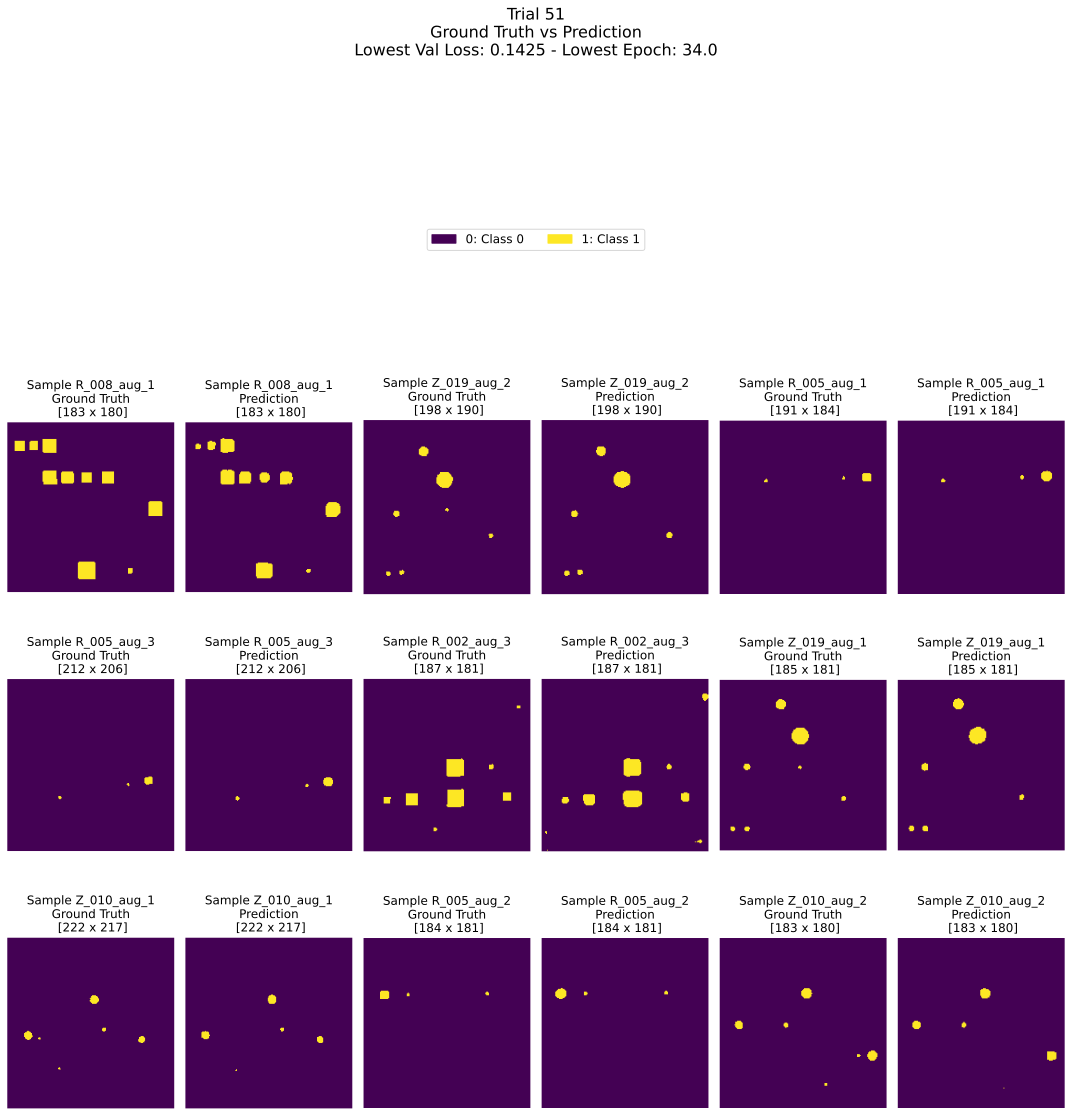

In [13]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"validation_gt_vs_pred.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

## Training vs Validation Loss Evolution

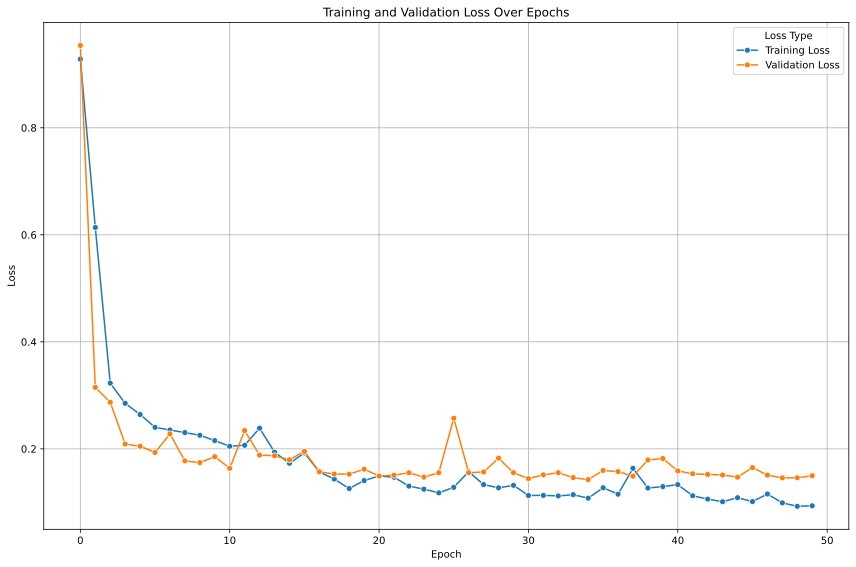

In [14]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"train_val_loss_evolution.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

# INFO HYPERPARAMETER STUDY LOADED

In [15]:
import os
import plotly.io as pio

# Set default renderer for Jupyter Notebook/Lab
pio.renderers.default = 'iframe'

# Visualize results
from optuna.visualization import plot_optimization_history

# Display the plot
plot_optimization_history(study)

In [16]:
# Visualize results
from optuna.visualization import plot_param_importances
import os


# Display the plot
plot_param_importances(study)

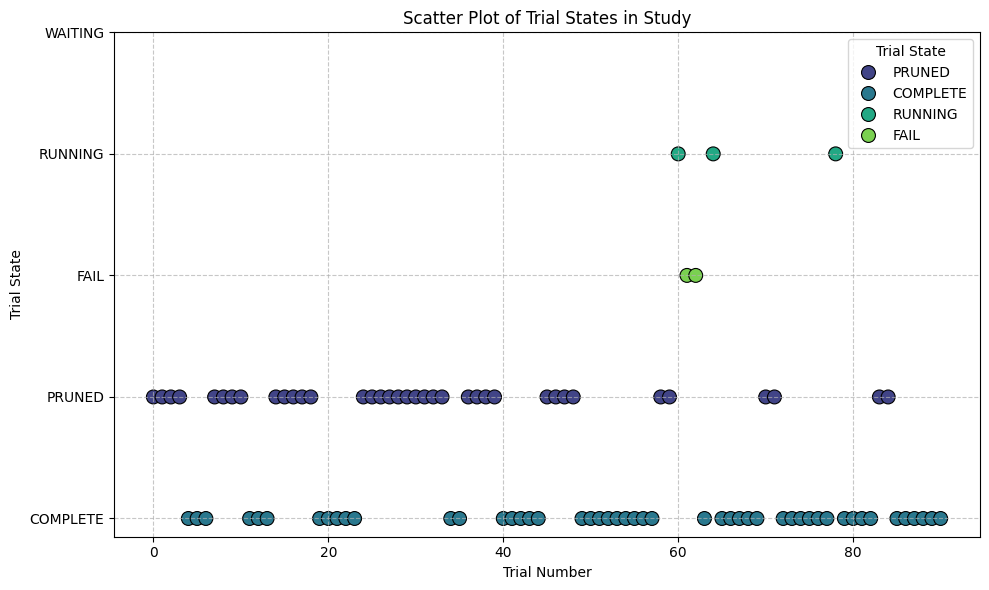

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Example data: Map trial states to numeric values
trial_states = [trial.state.name for trial in study.trials]
trial_numbers = range(len(study.trials))
state_mapping = {"COMPLETE": 1, "PRUNED": 2, "FAIL": 3, "RUNNING": 4, "WAITING": 5}
mapped_states = [state_mapping.get(state, 0) for state in trial_states]

# Create a DataFrame for plotting
data = pd.DataFrame({
    "Trial Number": trial_numbers,
    "Mapped State": mapped_states,
    "Trial State": trial_states
})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Trial Number",
    y="Mapped State",
    hue="Trial State",  # Add hue for categorical coloring
    palette="viridis",  # Use the Viridis colormap
    s=100,              # Marker size
    edgecolor="k"       # Black edges around markers
)

# Adjust y-axis ticks to display state names
plt.yticks(list(state_mapping.values()), list(state_mapping.keys()))

# Add title, labels, and grid
plt.xlabel("Trial Number")
plt.ylabel("Trial State")
plt.title("Scatter Plot of Trial States in Study")
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


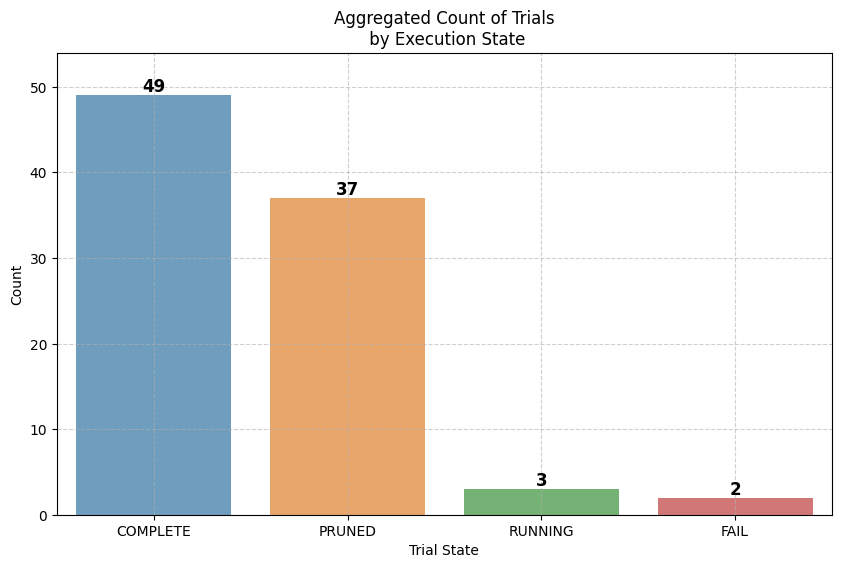

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import os

# Recalculate trial_counts if not already defined
trial_states = [trial.state.name for trial in study.trials]
trial_counts = pd.DataFrame(trial_states, columns=["Trial State"]).value_counts().reset_index()
trial_counts.columns = ["Trial State", "Count"]


# Create the plot with different colors for each state
plt.figure(figsize=(10, 6))
sns.barplot(
    data=trial_counts,
    x="Trial State",
    y="Count",
    hue="Trial State",  # Different colors for each state
    dodge=False,  # Ensure only one bar per state
    alpha=0.7
)

plt.title("Aggregated Count of Trials\n by Execution State")
plt.grid(linestyle="--", alpha=0.6)

# Adjust y-axis limits to make space for annotations
max_count = trial_counts["Count"].max()
plt.ylim(0, max_count + math.ceil(max_count * 0.1))  # Add 10% margin above the tallest bar

# Display values on top of each bar
for index, row in trial_counts.iterrows():
    plt.text(
        index, 
        row["Count"] + 0.4, 
        str(row["Count"]), 
        ha="center", 
        fontsize=12, 
        fontweight="bold"
    )


# Show the plot
plt.show()


Total Study Runtime: 8 days, 20:02:39.064417
Average Trial Duration: 1:58:17.328476
Minimum Trial Duration: 0:00:24.326908
Maximum Trial Duration: 23:31:14.951560
Total Time for PRUNED: 4:05:26.289787
Total Time for COMPLETE: 6 days, 21:33:12.184172
Total Time for FAIL: 3:50:46.431958


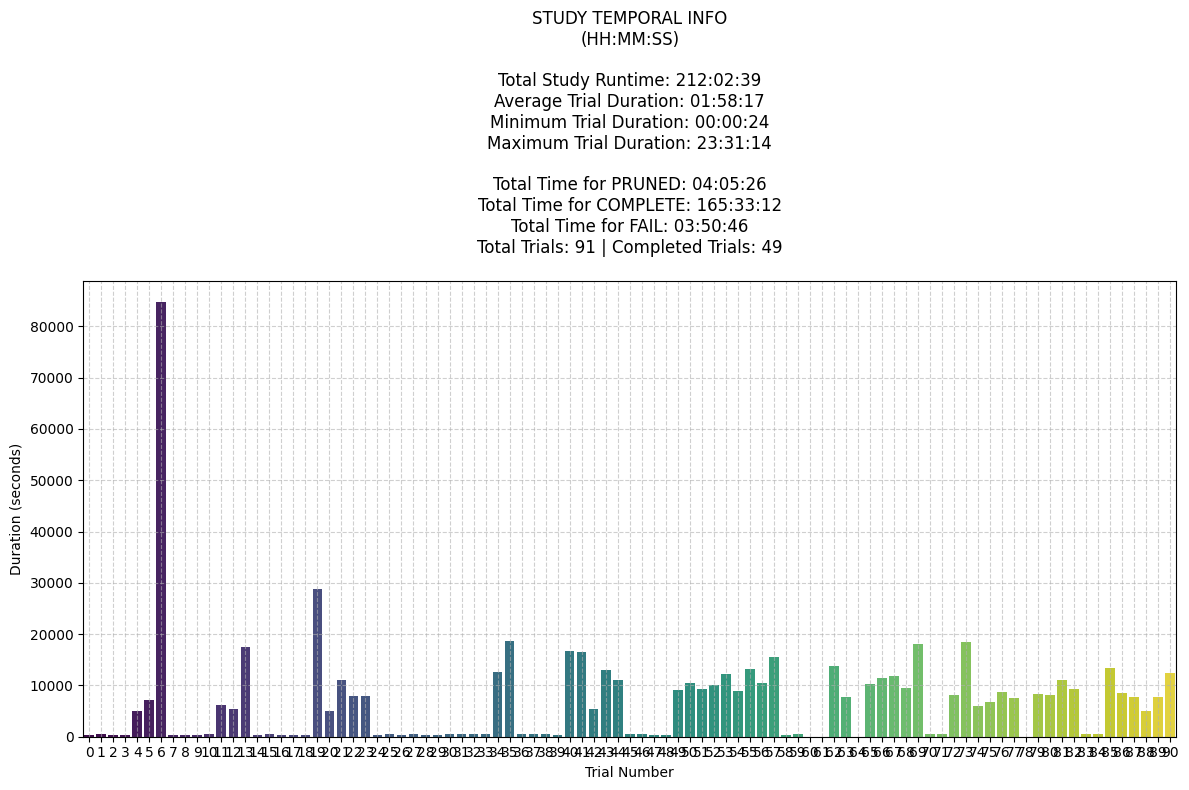

In [19]:
from datetime import timedelta, datetime
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Study-Level Statistics
study_start_time = min(
    (trial.datetime_start for trial in study.trials if trial.datetime_start),
    default=None
)

study_end_time = max(
    (trial.datetime_complete for trial in study.trials if trial.datetime_complete),
    default=datetime.now()
)
total_study_runtime = study_end_time - study_start_time

print(f"Total Study Runtime: {total_study_runtime}")

# Trial-Level Statistics
trial_durations = [
    trial.datetime_complete - trial.datetime_start
    for trial in study.trials
    if trial.datetime_start and trial.datetime_complete
]

if trial_durations:
    avg_duration = sum(trial_durations, timedelta()) / len(trial_durations)
    min_duration = min(trial_durations)
    max_duration = max(trial_durations)

    print(f"Average Trial Duration: {avg_duration}")
    print(f"Minimum Trial Duration: {min_duration}")
    print(f"Maximum Trial Duration: {max_duration}")
else:
    print("No completed trials to calculate durations.")

# Time by Trial State
state_durations = defaultdict(timedelta)
for trial in study.trials:
    if trial.datetime_start and trial.datetime_complete:
        duration = trial.datetime_complete - trial.datetime_start
        state_durations[trial.state] += duration

state_info_str = ""
for state, total_duration in state_durations.items():
    state_info = f"Total Time for {state.name}: {total_duration}"
    print(state_info)
    state_info_str += state_info + "\n"

# Visualize Trial Durations
trial_numbers = [trial.number for trial in study.trials]
trial_durations_in_seconds = [
    (trial.datetime_complete - trial.datetime_start).total_seconds()
    if trial.datetime_complete and trial.datetime_start else 0
    for trial in study.trials
]

# Convert timedelta objects to HH:MM:SS format
def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Format times
formatted_total_runtime = format_timedelta(total_study_runtime)
formatted_avg_duration = format_timedelta(avg_duration)
formatted_min_duration = format_timedelta(min_duration)
formatted_max_duration = format_timedelta(max_duration)

# Format state-specific durations
state_info_lines = [
    f"Total Time for {state.name}: {format_timedelta(duration)}"
    for state, duration in state_durations.items()
]
state_info_str = "\n".join(state_info_lines)
completed_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

# Create DataFrame for Seaborn
data = {
    "Trial Number": trial_numbers,
    "Duration (seconds)": trial_durations_in_seconds
}
df = pd.DataFrame(data)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df,
    x="Trial Number",
    y="Duration (seconds)",
    hue="Trial Number",  # Use hue to map colors
    dodge=False,  # Prevent multiple bars for each hue
    palette="viridis",  # Apply the color palette
    legend=False        # Hide the legend since it is unnecessary
)

# Add labels and title
plt.xlabel("Trial Number")
plt.ylabel("Duration (seconds)")
title_text = (
    "STUDY TEMPORAL INFO\n(HH:MM:SS)\n\n"
    f"Total Study Runtime: {formatted_total_runtime}\n"
    f"Average Trial Duration: {formatted_avg_duration}\n"
    f"Minimum Trial Duration: {formatted_min_duration}\n"
    f"Maximum Trial Duration: {formatted_max_duration}\n\n"
    f"{state_info_str}\n"
    f"Total Trials: {len(study.trials)} | Completed Trials: {len(completed_trials)}"
)
plt.title(title_text, loc="center", pad=20)
plt.grid(linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

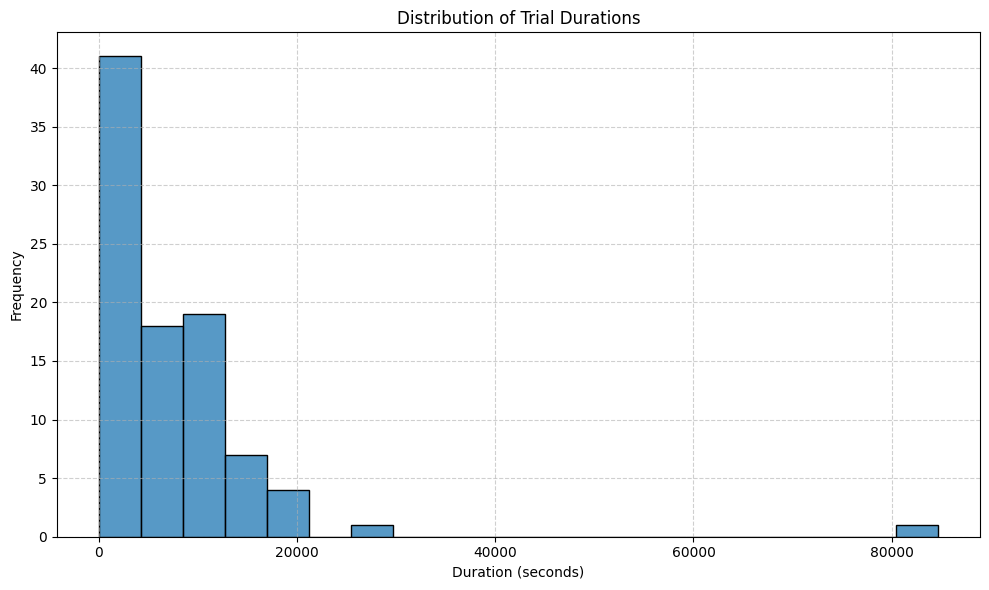

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Create DataFrame for durations
data = {
    "Duration (seconds)": trial_durations_in_seconds
}
df = pd.DataFrame(data)

# Plot histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="Duration (seconds)",
)

# Add labels and title
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title(
    "Distribution of Trial Durations",
    loc="center"
)
plt.grid(linestyle="--", alpha=0.6)


# Show the plot
plt.tight_layout()
plt.show()


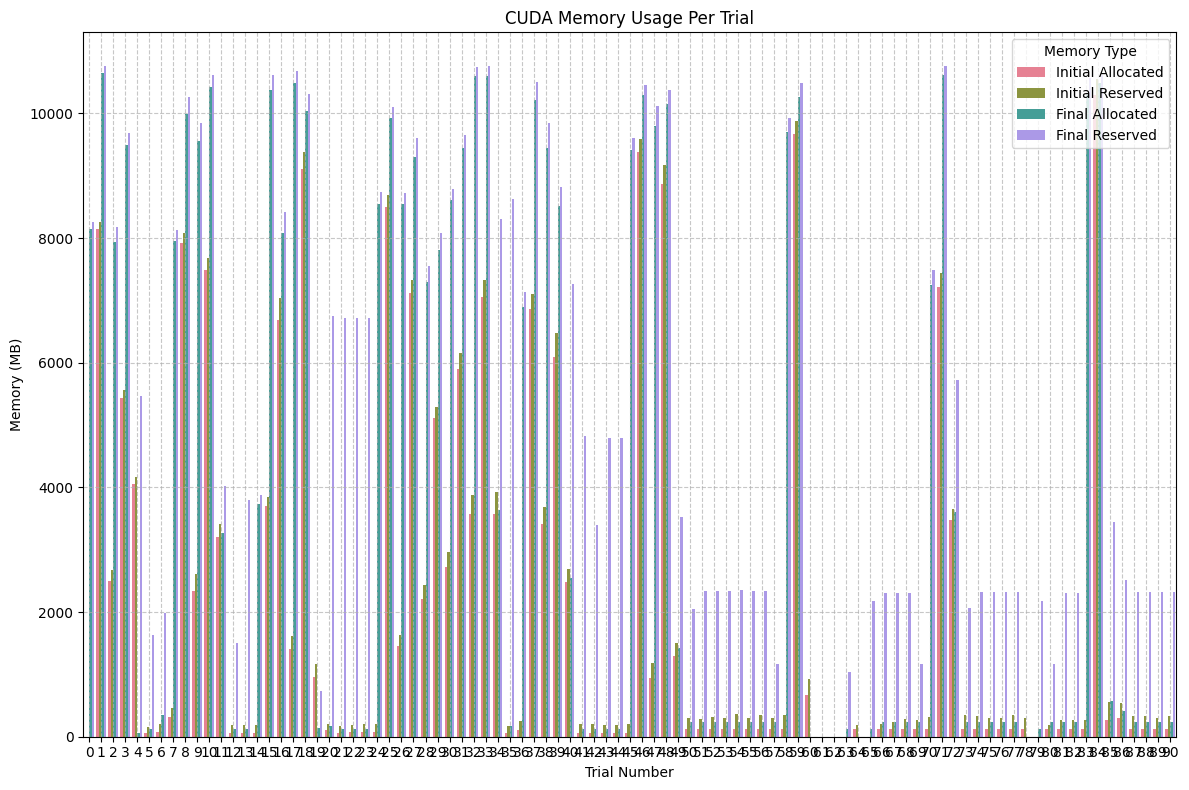

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Extract data for plotting
trial_numbers = list(range(0, len(study.trials)))
initial_allocated = [trial.user_attrs["initial_allocated_cuda_memory"] for trial in study.trials if "initial_allocated_cuda_memory" in trial.user_attrs]
initial_reserved = [trial.user_attrs["initial_reserved_cuda_memory"] for trial in study.trials if "initial_reserved_cuda_memory" in trial.user_attrs]
final_allocated = [trial.user_attrs["final_allocated_cuda_memory"] for trial in study.trials if "final_allocated_cuda_memory" in trial.user_attrs]
final_reserved = [trial.user_attrs["final_reserved_cuda_memory"] for trial in study.trials if "final_reserved_cuda_memory" in trial.user_attrs]

# Prepare the data for Seaborn
data = pd.DataFrame({
    "Trial Number": trial_numbers,
    "Initial Allocated": initial_allocated,
    "Initial Reserved": initial_reserved,
    "Final Allocated": final_allocated,
    "Final Reserved": final_reserved,
})

# Melt the data for easier plotting with Seaborn
data_melted = data.melt(id_vars="Trial Number", 
                        var_name="Memory Type", 
                        value_name="Memory (MB)")

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_melted,
    x="Trial Number",
    y="Memory (MB)",
    hue="Memory Type",
    dodge=True,  # Ensure separate bars for each memory type
    palette="husl"  # Color palette
)

# Add labels and title
plt.xlabel("Trial Number")
plt.ylabel("Memory (MB)")
plt.title("CUDA Memory Usage Per Trial")
plt.legend(title="Memory Type", loc="upper right")
plt.grid(linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


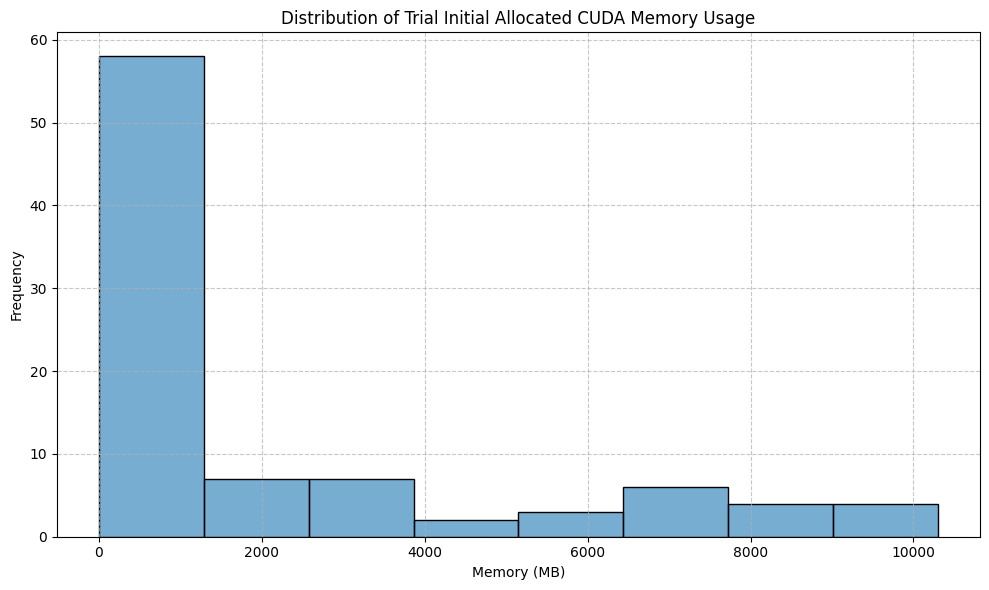

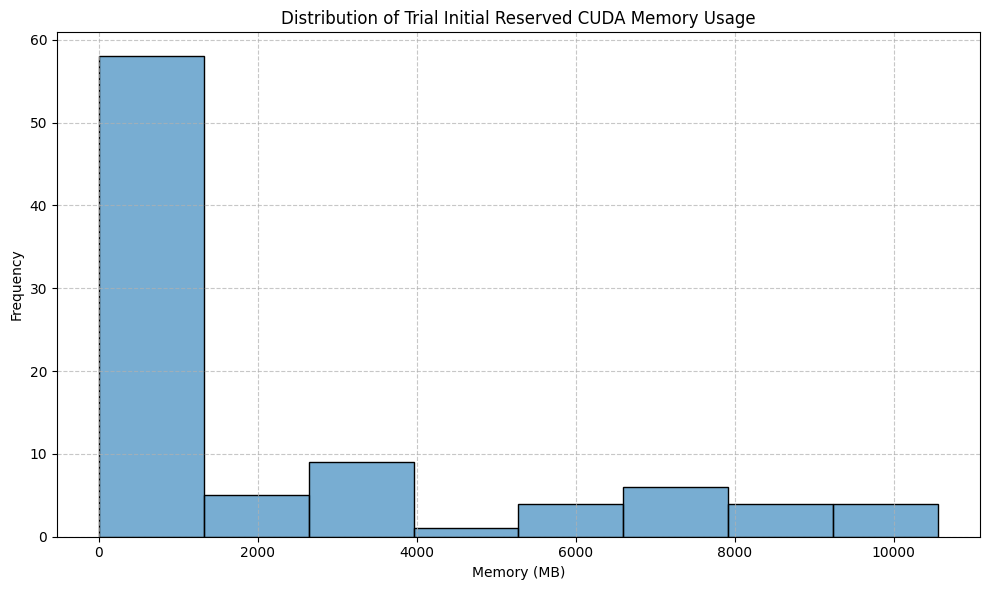

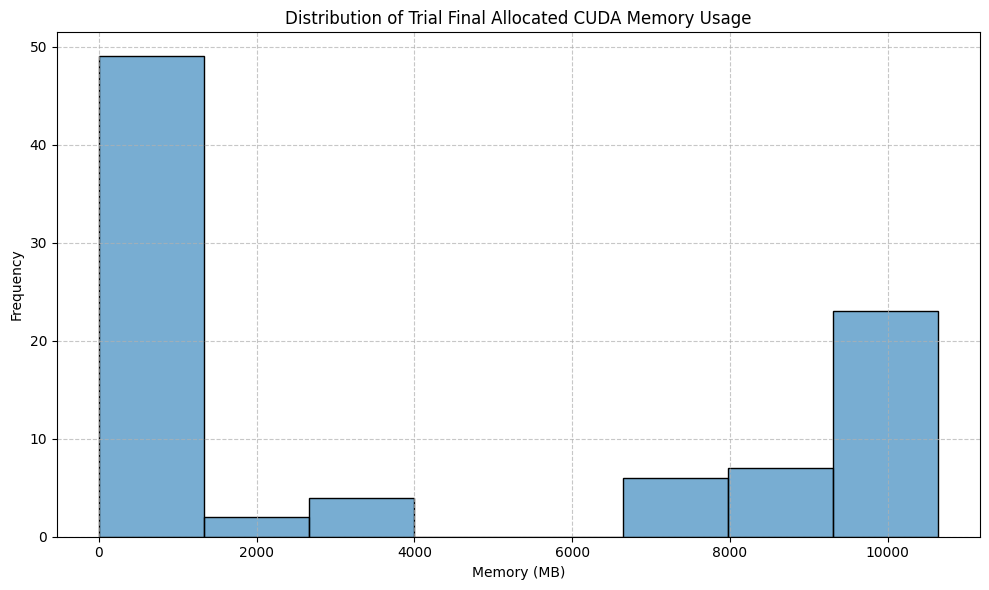

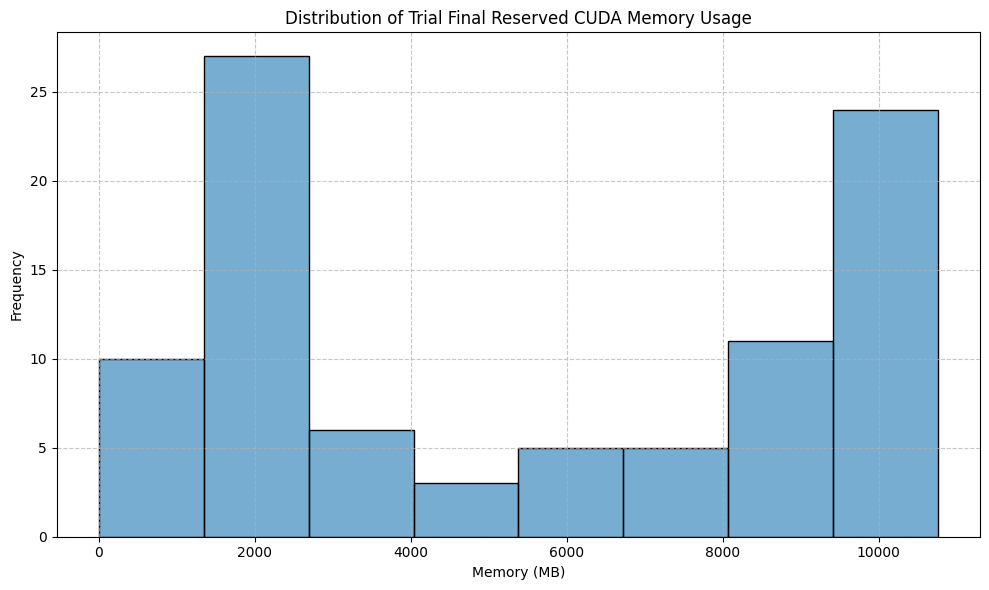

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Extract data for plotting
initial_allocated = [trial.user_attrs["initial_allocated_cuda_memory"] for trial in study.trials if "initial_allocated_cuda_memory" in trial.user_attrs]
initial_reserved = [trial.user_attrs["initial_reserved_cuda_memory"] for trial in study.trials if "initial_reserved_cuda_memory" in trial.user_attrs]
final_allocated = [trial.user_attrs["final_allocated_cuda_memory"] for trial in study.trials if "final_allocated_cuda_memory" in trial.user_attrs]
final_reserved = [trial.user_attrs["final_reserved_cuda_memory"] for trial in study.trials if "final_reserved_cuda_memory" in trial.user_attrs]

# Combine the data into a dictionary for convenience
data = {
    "Initial Allocated": initial_allocated,
    "Initial Reserved": initial_reserved,
    "Final Allocated": final_allocated,
    "Final Reserved": final_reserved
}

# Create separate histograms for each memory type
for label, values in data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(
        values,
        alpha=0.6
    )
    
    # Add labels and title
    plt.xlabel("Memory (MB)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Trial {label} CUDA Memory Usage")
    plt.grid(linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


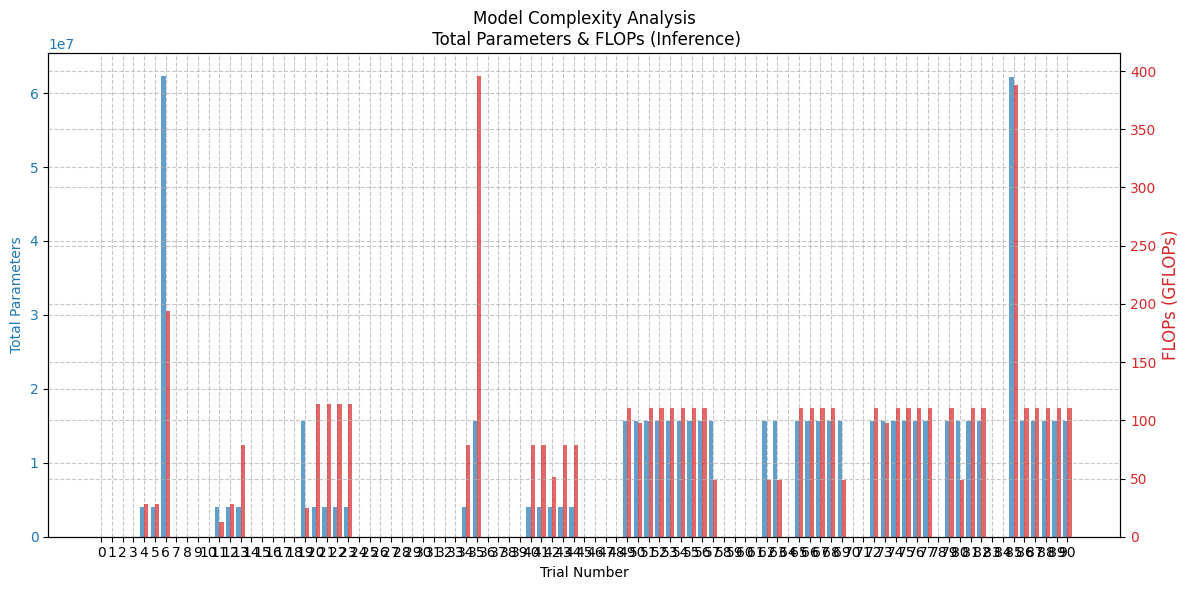

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Extract data for plotting
trial_numbers = list(range(0, len(study.trials)))
total_params = [trial.user_attrs["model_total_params"] for trial in study.trials if "model_total_params" in trial.user_attrs]
flops_inference = [trial.user_attrs["model_gflops_inference"] for trial in study.trials if "model_gflops_inference" in trial.user_attrs]

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width for better visualization
bar_width = 0.4

# Bar positions
x_indices_params = np.arange(len(total_params))
x_indices_flops = x_indices_params + bar_width

# Plot total parameters as bars
color = 'tab:blue'
ax1.set_xlabel("Trial Number")
ax1.set_ylabel("Total Parameters", color=color)
ax1.bar(x_indices_params, total_params, width=bar_width, label="Total Parameters", color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='--', alpha=0.7)

# Second y-axis for FLOPs
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("FLOPs (GFLOPs)", color=color, fontsize=12)
ax2.bar(x_indices_flops, flops_inference, width=bar_width, label="FLOPs (GFLOPs)", color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(linestyle='--', alpha=0.7)

# Adjust x-axis ticks to align with bars
ax1.set_xticks(x_indices_params + bar_width / 2)
ax1.set_xticklabels([f"{i}" for i in range(len(total_params))])

# Add title
plt.title("Model Complexity Analysis\n Total Parameters & FLOPs (Inference)")

# Adjust layout for better spacing
fig.tight_layout()


# Show the plot
plt.show()


# OBJECTIVE FUNCTION

In [24]:
import optuna
import torch
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import CSVLogger
import pprint
import shutil
import gc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import os
import time
import torchinfo
import ptflops
import random
random.seed(42)
from PIL import Image
import seaborn as sns
import numpy as np
from datetime import timedelta, datetime


import importlib
# Own library
import utils.data_utils
importlib.reload(utils.data_utils)
from utils.data_utils import custom_collate


# Function to apply the viridis colormap and convert to uint8
def apply_colormap_and_normalize(array, cmap, vmin, vmax):
    norm_array = (array - vmin) / (vmax - vmin)  # Normalize to [0, 1]
    norm_array = np.clip(norm_array, 0, 1)  # Clip values to avoid overflow
    colormap = plt.get_cmap(cmap)
    rgba_img = colormap(norm_array)  # Apply colormap, returns RGBA
    rgb_img = (rgba_img[:, :, :3] * 255).astype("uint8")  # Convert to RGB
    return rgb_img


def objective(trial):

    # Initialize user-defined trial attributes
    trial.set_user_attr("model_total_params", 0)
    trial.set_user_attr("model_trainable_params", 0)
    trial.set_user_attr("model_non_trainable_params", 0)
    trial.set_user_attr("model_gflops_inference", 0) 
    trial.set_user_attr("initial_allocated_cuda_memory", 0)
    trial.set_user_attr("initial_reserved_cuda_memory", 0)
    trial.set_user_attr("final_allocated_cuda_memory", 0)
    trial.set_user_attr("final_reserved_cuda_memory", 0)

    try:

        ########## TRAINING/INFERENCE HYPERPARAMETERS #########
    
        lr_optimizer = trial.suggest_float("lr_optimizer", 1e-5, 1e-3, log=True)  # Log scale for learning rates
        weight_decay_optimizer = trial.suggest_float("weight_decay_optimizer", 1e-6, 1e-2, log=True) # Log scale for weight decay
        warmup_epochs_lr_scheduler = trial.suggest_int("warmup_epochs_lr_scheduler", 3, 10)  # Integer range
        max_training_epochs = trial.suggest_categorical("max_training_epochs", [10000])
        patience_epochs_early_stopping = trial.suggest_int("patience_epochs_early_stopping", 7, 20)  # Integer range
        batch_size_training = trial.suggest_int("batch_size_training", 1, 4)
        batch_size_inference = trial.suggest_categorical("batch_size_inference", [1]) # It doesn't matter the batch size. It always processes the patches sequentially inside the batch.
        num_batches_grad_accumulation = trial.suggest_int("num_batches_grad_accumulation", 2, 6, step=2)
        post_processing_strategy = trial.suggest_categorical("post_processing_strategy", ["fill_first","weighted_average"]) 
        pre_processing_strategy = trial.suggest_categorical("pre_processing_strategy", ["uniform_gaussian_smoothed_equidistant_subsampling","hotspot_centered_gaussian_smoothed_equidistant_subsampling"])
        
        ########## DATA PREPROCESSING HYPERPARAMETERS #########
        
        overlap_training = trial.suggest_float("overlap_training", 0, 0.3, step = 0.15)
        overlap_training = (overlap_training, overlap_training)
        overlap_inference = trial.suggest_categorical("overlap_inference", ["(0,0)"])

        ########################################################################
        
        training_config={
            "lr_optimizer": lr_optimizer,
            "weight_decay_optimizer": weight_decay_optimizer,
            "warmup_epochs_lr_scheduler": warmup_epochs_lr_scheduler,
            "max_training_epochs": max_training_epochs,
            "patience_epochs_early_stopping": patience_epochs_early_stopping,
            "batch_size_training": batch_size_training,
            "batch_size_inference": batch_size_inference,
            "num_batches_grad_accumulation": num_batches_grad_accumulation,
            "overlap_training": overlap_training,
            "overlap_inference": eval(overlap_inference),
            "post_processing_strategy": post_processing_strategy,
            "pre_processing_strategy": pre_processing_strategy
        }

        ########## MODEL HYPERPARAMETERS #########

        # Use SWIN Version 2
        use_SWIN_v2 = trial.suggest_categorical("use_SWIN_v2", [False]) # It adds a residual convolution block at the beginning of each swin layer. (with instance normalization)
        
        # Architecture
        model_spatial_input_dim = trial.suggest_int("model_spatial_input_dims", 32, 192, step=32)
        exponent_model_temporal_input_dim = trial.suggest_int("exponent_model_temporal_input_dim", 0, 3)
        model_temporal_input_dim = 64*(2**exponent_model_temporal_input_dim)
        model_input_dimensions = (model_spatial_input_dim, model_spatial_input_dim) + (model_temporal_input_dim,)
        exponent_initial_feature_embedding_size = trial.suggest_int("exponent_initial_feature_embedding_size", 0, 3)
        initial_feature_embedding_size = 12*(2**exponent_initial_feature_embedding_size)
        patch_embedding_size = trial.suggest_categorical("patch_embedding_size", [2])
        num_swin_transformer_blocks_in_layers = trial.suggest_categorical("num_swin_transformer_blocks_in_layers", [2])
        multilayer_perceptron_expansion_ratio_transformer_block=trial.suggest_categorical("mlp_ratio", [4.0]) # Defines the expansion of the MLP's hidden dimension relative to its input dimension

        # Attention
        initial_attention_head = trial.suggest_int("initial_attention_head", 2, 3, step=1)
        attention_heads = (initial_attention_head, initial_attention_head*2, initial_attention_head*4, initial_attention_head*8)
        attention_window_size = trial.suggest_int("attention_window_size", 7, 8, step=1)
        attention_qkv_bias_projections = trial.suggest_categorical("attention_qkv_projections_bias", [True])
        attention_weights_drop_rate =  trial.suggest_categorical("attention_weights_drop_rate", [0]) #[0, 0.1, 0.2]

        # Normalization
        layer_normalization_after_each_layer_in_SWIN_Transformer = trial.suggest_categorical("layer_normalization_after_each_layer_in_SWIN_Transformer", [True])
        type_normalization_in_UNET_block = trial.suggest_categorical("type_normalization_in_UNET_block", ["instance"])
        normalization_after_patch_embedding = trial.suggest_categorical("normalization_after_patch_embedding", [False])

        # Regularization
        transformer_block_drop_rate = trial.suggest_categorical("transformer_block_drop_rate", [0]) #[0, 0.1, 0.3]
        transformer_block_residual_block_dropout_path_rate = trial.suggest_categorical("transformer_block_residual_block_dropout_path_rate", [0]) #[0, 0.1, 0.2]

        # Architecture Configuration
        architecture_config={
            "use_SWIN_v2": use_SWIN_v2,
            "model_input_dimensions": model_input_dimensions,
            "model_input_channels": 1,
            "model_output_channels": 2, # 2 output channels = 2 output classes (i.e. defective/non-defective)
            "initial_feature_embedding_size": initial_feature_embedding_size,
            "patch_embedding_size": (patch_embedding_size, patch_embedding_size, patch_embedding_size),
            "num_swin_transformer_blocks_in_layers": (num_swin_transformer_blocks_in_layers, num_swin_transformer_blocks_in_layers, num_swin_transformer_blocks_in_layers, num_swin_transformer_blocks_in_layers),
            "mlp_ratio": multilayer_perceptron_expansion_ratio_transformer_block,
        }
        
        # Attention Configuration
        attention_config={
            "heads": attention_heads,
            "window_size": (attention_window_size, attention_window_size, attention_window_size),
            "qkv_bias": attention_qkv_bias_projections,
            "drop_rate": attention_weights_drop_rate,
        }
        
        # Normalization Configuration
        normalization_config={
            "use_norm_in_swinViT_after_layer": layer_normalization_after_each_layer_in_SWIN_Transformer,
            "patch_norm_in_swinViT": normalization_after_patch_embedding,
            "unet_block_norm_type": type_normalization_in_UNET_block
        }
        
        # Regularization Configuration
        regularization_config={
            "transformer_block_drop_rate": transformer_block_drop_rate,
            "transformer_block_residual_block_dropout_path_rate": transformer_block_residual_block_dropout_path_rate,
        }

        # Combine all configs into a single dictionary
        trial_config = {
            "TRAINING_CONFIG": training_config,
            "ARCHITECTURE_CONFIG": architecture_config,
            "ATTENTION_CONFIG": attention_config,
            "NORMALIZATION_CONFIG": normalization_config,
            "REGULARIZATION_CONFIG": regularization_config,
        }

        print()
        print(f"{'=' * 50}")
        print(f"{'=' * 16} RUNNING TRIAL: {trial.number} {'=' * 16}")
        print(f"{'=' * 16} Time: {datetime.now()} {'=' * 16}")
        print(f"{'=' * 50}")
        print()
        
        # Pretty-print the configurations
        pprint.pprint(trial_config, sort_dicts=False, width=100)

        print()

        # Log CUDA memory at the start of the trial
        if torch.cuda.is_available():
            trial.set_user_attr("initial_allocated_cuda_memory", torch.cuda.memory_allocated() / 1e6)
            trial.set_user_attr("initial_reserved_cuda_memory", torch.cuda.memory_reserved() / 1e6)
            trial.set_user_attr("final_allocated_cuda_memory", 0)
            trial.set_user_attr("final_reserved_cuda_memory", 0)
        
        ########## DATA PREPARATION #########

        # Creation Datasets 
        train_dataset = SwinUNETR_AIRT_Dataset(
            is_inference_mode = False,
            augmentation = True,
            metadata_dict_with_files_selected=train_test_files.copy(),
            data_dir=DATA_DIR,
            model_input_dims=model_input_dimensions,
            overlap = overlap_training,
            preprocessing_strategy = pre_processing_strategy
        )

        val_dataset = SwinUNETR_AIRT_Dataset(
            is_inference_mode = True,
            augmentation = True,
            metadata_dict_with_files_selected=validation_files.copy(),
            data_dir=DATA_DIR,
            model_input_dims=model_input_dimensions,
            overlap = eval(overlap_inference),
            preprocessing_strategy = pre_processing_strategy
        )

        # Configure DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size_training, shuffle=True, num_workers=NUM_WORKERS)
        val_loader = DataLoader(val_dataset, batch_size=batch_size_inference, collate_fn=custom_collate, num_workers=NUM_WORKERS)
        
        ########## MODEL INSTANTIATION #########
        
        model = SwinUNETR_AIRT_LightningModel(
            # Training Configuration
            training_config=training_config,            
            # Architecture Configuration
            architecture_config=architecture_config,            
            # Attention Configuration
            attention_config=attention_config,
            # Normalization Configuration
            normalization_config=normalization_config,         
            # Regularization Configuration
            regularization_config=regularization_config
        )

        ########## TRAINER INSTANTIATION #########

        # Early stopping callback
        early_stopping_callback = EarlyStopping(
            monitor='val_loss',
            patience=patience_epochs_early_stopping,
            mode='min'
        )

        # Define logger
        logger = CSVLogger(
            save_dir=tuning_dir,
            name="",
            version="")
        
        trainer = Trainer(
            max_epochs=max_training_epochs,
            callbacks=[early_stopping_callback],
            precision="16-mixed",  # Enable FP16 mixed precision
            accumulate_grad_batches=num_batches_grad_accumulation,
            enable_checkpointing=False,
            log_every_n_steps=1,
            logger=logger,
            # Add timeout for this trial
            max_time="00:00:05:00"  # Limit TIME (DD:HH:MM:SS format)
        )

        ########## TRAINING #########

        # Train the model
        trainer.fit(model, train_loader, val_loader)

        input_size = (batch_size_inference, 1, model_input_dimensions[0], model_input_dimensions[1],model_input_dimensions[2])

        ### Get Total, Trainable, Non-Trainable Parameters
        model_summary = torchinfo.summary(model.model, input_size=input_size, verbose=0)

        # Store parameters in variables
        total_params = model_summary.total_params
        trainable_params = model_summary.trainable_params
        non_trainable_params = total_params - trainable_params

        ### Get FLOPs (Floating Point Operations)
        # Input size for ptflops is without batch size: (channels, height, width)
        macs, params = ptflops.get_model_complexity_info(model.model, input_size[1:], as_strings=False, verbose=False)
        # FLOPs are twice the MACs (Multiply-Accumulate Operations)
        if macs is None:
            raise torch.cuda.OutOfMemoryError()
            
        flops = 2 * macs

        trial.set_user_attr("model_total_params", total_params)
        trial.set_user_attr("model_trainable_params", trainable_params)
        trial.set_user_attr("model_non_trainable_params", non_trainable_params)
        trial.set_user_attr("model_gflops_inference", flops / 1e9) # Convert FLOPs to GFLOPs

        print()
        print(f"Total Parameters: {total_params}")
        print(f"Trainable Parameters: {trainable_params}")
        print(f"Non-Trainable Parameters: {non_trainable_params}")
        print(f"FLOPs: {flops / 1e9:.3f} GFLOPs")

        # Retrieve the best validation loss
        metrics_file = os.path.join(tuning_dir, 'metrics.csv')
        metrics_df = pd.read_csv(metrics_file)
        
        # Initialize variables to make them accessible outside the if scope
        lowest_val_loss = None
        lowest_epoch = None

        # Ensure val_loss column exists and drop NaN values
        if 'val_loss_epoch' in metrics_df.columns:
            val_loss_series = metrics_df['val_loss_epoch'].dropna()
            # Find the lowest val_loss
            lowest_val_loss = val_loss_series.min()
            # Find the epoch corresponding to the lowest val_loss
            lowest_val_loss_row = metrics_df.loc[val_loss_series.idxmin()]
            lowest_epoch = lowest_val_loss_row['epoch']
        
            print(f"Lowest val_loss: {lowest_val_loss} at epoch {lowest_epoch}")
        else:
            print(f"val_loss column not found in {metrics_file}")

        ######### PLOTTING ##########

        ##### PLOT BEST VAL RESULTS #####

        print()
        print(f"{'=' * 10} PLOTTING BEST EPOCH VALIDATION RESULTS {'=' * 10}")
        print()

        # Control the maximum number of samples to show
        num_samples_to_show = 9
        
        # Adjust the number of samples if fewer samples are available
        available_samples = list(zip(
            model.best_epoch_val_sample_ids,
            model.best_epoch_val_ground_truths,
            model.best_epoch_val_predictions
        ))
        
        if len(available_samples) < num_samples_to_show:
            print(f"Number of available samples ({len(available_samples)}) is less than requested ({num_samples_to_show}). Plotting all available samples.")
            num_samples_to_show = len(available_samples)
        
        # Randomly sample the data if more samples are available than requested
        plot_samples = random.sample(available_samples, num_samples_to_show)
        
        # Calculate the number of rows needed (3 pairs per row)
        pairs_per_row = 3
        num_rows = (num_samples_to_show + pairs_per_row - 1) // pairs_per_row  # Ceiling division

        # Find unique classes dynamically
        all_classes = set()
        for gt, pred in zip(model.best_epoch_val_ground_truths, model.best_epoch_val_predictions):
            all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
            all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions
        
        # Sort the classes to ensure order
        all_classes = sorted(all_classes)
        
        # Define class labels dynamically (for simplicity, use numeric labels for now)
        class_labels = {cls: f"Class {cls}" for cls in all_classes}
        num_classes = len(class_labels)
        
        # Create a discrete colormap with exactly `num_classes` colors
        colormap = plt.cm.get_cmap("viridis", num_classes)
        
        # Create legend patches using discrete colors from the colormap
        legend_patches = [
            mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
            for i, label in class_labels.items()
        ]
        # Create subplots
        fig, axes = plt.subplots(num_rows, pairs_per_row * 2, figsize=(15, 5 * num_rows))
        
        # If there's only one row, ensure axes is 2D
        if num_rows == 1:
            axes = [axes]
        
        # Flatten axes for easier indexing
        axes = [ax for row_axes in axes for ax in (row_axes if isinstance(row_axes, (list, np.ndarray)) else [row_axes])]
        
        # Plot ground truth and predictions
        for idx, (sample_id, ground_truth, prediction) in enumerate(plot_samples):
            # Calculate column index (each pair takes two columns)
            col_idx = idx * 2
        
            # Ground truth
            axes[col_idx].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none",
                                 vmin=min(all_classes), vmax=max(all_classes))
            axes[col_idx].set_title(f"Sample {sample_id}\n Ground Truth \n [{ground_truth.shape[0]} x {ground_truth.shape[1]}]")
            axes[col_idx].axis("off")
        
            # Prediction
            axes[col_idx + 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none",
                                     vmin=min(all_classes), vmax=max(all_classes))
            axes[col_idx + 1].set_title(f"Sample {sample_id}\n Prediction \n [{prediction.shape[0]} x {prediction.shape[1]}]")
            axes[col_idx + 1].axis("off")
        
        # Hide any unused subplots
        for unused_ax in axes[len(plot_samples) * 2:]:
            unused_ax.axis("off")
        
        # Add legend
        fig.legend(
            handles=legend_patches,
            loc="upper center",  # Places the legend below the plot
            ncol=len(all_classes),
            bbox_to_anchor=(0.5, 0.9),  # Adjusts position below the plot
            fontsize=12
        )
        
        # Add title
        fig.suptitle(
            f"Trial {trial.number}\nGround Truth vs Prediction\n"
            f"Lowest Val Loss: {lowest_val_loss:.4f} - Lowest Epoch: {lowest_epoch}",
            fontsize=16, y=1.10
        )
        
        
        plt.tight_layout(rect=[0, 0, 1, 0.85])
        plt.show()
        plt.close(fig)

        ##### PLOT TRAINING & VALIDATION LOSSES EVOLUTION ##### 

        print()
        print(f"{'=' * 10} PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION {'=' * 10}")
        print()
        
        # Path to the latest metrics file
        metrics_file = os.path.join(tuning_dir, 'metrics.csv')
        metrics_df = pd.read_csv(metrics_file)
        
        # Handle train_loss and val_loss separately
        train_loss = metrics_df[['epoch', 'train_loss_epoch']].dropna().rename(columns={'train_loss_epoch': 'loss'})
        train_loss['type'] = 'Training Loss'
        
        val_loss = metrics_df[['epoch', 'val_loss_epoch']].dropna().rename(columns={'val_loss_epoch': 'loss'})
        val_loss['type'] = 'Validation Loss'
        
        # Combine the two datasets for seaborn
        plot_data = pd.concat([train_loss, val_loss], axis=0)
        
        # Plot using seaborn
        plt.figure(figsize=(12, 8))
        sns.lineplot(data=plot_data, x='epoch', y='loss', hue='type', marker="o", style="type", dashes=False)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss Over Epochs")
        plt.grid(True)
        plt.legend(title="Loss Type")
        plt.show()

        # Directory to save individual SVG images
        best_trial_dir = os.path.join(tuning_dir, "best_trial")
        os.makedirs(best_trial_dir, exist_ok=True)  # Create the folder if it doesn't exist

        completed_trials = [t for t in trial.study.trials if t.state == optuna.trial.TrialState.COMPLETE]

        if len(completed_trials) == 0 or trial.study.best_trial.value > lowest_val_loss:

            ##### SAVING PLOT BEST TRIAL TRAINING/VALIDATION LOSS EVOLUTION ##### 

            # Path to the latest metrics file
            metrics_file = os.path.join(tuning_dir, 'metrics.csv')
            metrics_df = pd.read_csv(metrics_file)
            
            # Handle train_loss and val_loss separately
            train_loss = metrics_df[['epoch', 'train_loss_epoch']].dropna().rename(columns={'train_loss_epoch': 'loss'})
            train_loss['type'] = 'Training Loss'
            
            val_loss = metrics_df[['epoch', 'val_loss_epoch']].dropna().rename(columns={'val_loss_epoch': 'loss'})
            val_loss['type'] = 'Validation Loss'
            
            # Combine the two datasets for seaborn
            plot_data = pd.concat([train_loss, val_loss], axis=0)
            
            # Plot using seaborn
            fig = plt.figure(figsize=(12, 8))
            sns.lineplot(data=plot_data, x='epoch', y='loss', hue='type', marker="o", style="type", dashes=False)
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.title("Training and Validation Loss Over Epochs")
            plt.grid(True)
            plt.legend(title="Loss Type")

            # Save as SVG
            plt.tight_layout()
            result_plot_path = os.path.join(best_trial_dir, f"train_val_loss_evolution.svg")
            fig.savefig(result_plot_path, format="svg", bbox_inches="tight")
            print(f"Best Trial Training/Vlaidation Loss Evolution plot saved at: {result_plot_path}")
            plt.close(fig)
            
            ##### SAVING PLOT BEST TRIAL VALIDATION RESULTS #####            
            
            # Control the maximum number of samples to show
            num_samples_to_show = 9
            
            # Adjust the number of samples if fewer samples are available
            available_samples = list(zip(
                model.best_epoch_val_sample_ids,
                model.best_epoch_val_ground_truths,
                model.best_epoch_val_predictions
            ))
            
            if len(available_samples) < num_samples_to_show:
                print(f"Number of available samples ({len(available_samples)}) is less than requested ({num_samples_to_show}). Plotting all available samples.")
                num_samples_to_show = len(available_samples)
            
            # Randomly sample the data if more samples are available than requested
            plot_samples = random.sample(available_samples, num_samples_to_show)
            
            # Calculate the number of rows needed (3 pairs per row)
            pairs_per_row = 3
            num_rows = (num_samples_to_show + pairs_per_row - 1) // pairs_per_row  # Ceiling division

            # Find unique classes dynamically
            all_classes = set()
            for gt, pred in zip(model.best_epoch_val_ground_truths, model.best_epoch_val_predictions):
                all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
                all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions
            
            # Sort the classes to ensure order
            all_classes = sorted(all_classes)
            
            # Define class labels dynamically (for simplicity, use numeric labels for now)
            class_labels = {cls: f"Class {cls}" for cls in all_classes}
            num_classes = len(class_labels)
            
            # Create a discrete colormap with exactly `num_classes` colors
            colormap = plt.cm.get_cmap("viridis", num_classes)
            
            # Create legend patches using discrete colors from the colormap
            legend_patches = [
                mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
                for i, label in class_labels.items()
            ]
            
            # Create subplots
            fig, axes = plt.subplots(num_rows, pairs_per_row * 2, figsize=(15, 5 * num_rows))
            
            # If there's only one row, ensure axes is 2D
            if num_rows == 1:
                axes = [axes]
            
            # Flatten axes for easier indexing
            axes = [ax for row_axes in axes for ax in (row_axes if isinstance(row_axes, (list, np.ndarray)) else [row_axes])]
            
            # Plot ground truth and predictions
            for idx, (sample_id, ground_truth, prediction) in enumerate(plot_samples):
                # Calculate column index (each pair takes two columns)
                col_idx = idx * 2
            
                # Ground truth
                axes[col_idx].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none",
                                     vmin=min(all_classes), vmax=max(all_classes))
                axes[col_idx].set_title(f"Sample {sample_id}\n Ground Truth \n [{ground_truth.shape[0]} x {ground_truth.shape[1]}]")
                axes[col_idx].axis("off")

                # Saving ground truth image
                ground_truth_data = ground_truth.cpu().numpy()  # Convert to NumPy array
                ground_truth_colored = apply_colormap_and_normalize(
                    ground_truth_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
                )
                ground_truth_img = Image.fromarray(ground_truth_colored)  # Convert to Pillow Image
                ground_truth_img.save(os.path.join(best_trial_dir, f"{sample_id}_gt.png"))
            
                # Prediction
                axes[col_idx + 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none",
                                         vmin=min(all_classes), vmax=max(all_classes))
                axes[col_idx + 1].set_title(f"Sample {sample_id}\n Prediction \n [{prediction.shape[0]} x {prediction.shape[1]}]")
                axes[col_idx + 1].axis("off")

                # Saving prediction image
                prediction_data = prediction.cpu().numpy()  # Convert to NumPy array
                prediction_colored = apply_colormap_and_normalize(
                    prediction_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
                )
                prediction_img = Image.fromarray(prediction_colored)  # Convert to Pillow Image
                prediction_img.save(os.path.join(best_trial_dir, f"{sample_id}_pred.png"))
            
            # Hide any unused subplots
            for unused_ax in axes[len(plot_samples) * 2:]:
                unused_ax.axis("off")
            
            # Add legend
            fig.legend(
                handles=legend_patches,
                loc="upper center",  # Places the legend below the plot
                ncol=len(all_classes),
                bbox_to_anchor=(0.5, 0.9),  # Adjusts position below the plot
                fontsize=12
            )
            
            # Add title
            fig.suptitle(
                f"Trial {trial.number}\nGround Truth vs Prediction\n"
                f"Lowest Val Loss: {lowest_val_loss:.4f} - Lowest Epoch: {lowest_epoch}",
                fontsize=16, y=1.10
            )
            
            # Save as SVG
            plt.tight_layout(rect=[0, 0, 1, 0.85])
            result_plot_path = os.path.join(best_trial_dir, f"validation_gt_vs_pred.svg")
            fig.savefig(result_plot_path, format="svg", bbox_inches="tight")
            print(f"Validation results plot saved at: {result_plot_path}")
            plt.close(fig)



        # Log CUDA memory at the start of the trial
        if torch.cuda.is_available():
            trial.set_user_attr("final_allocated_cuda_memory", torch.cuda.memory_allocated() / 1e6)
            trial.set_user_attr("final_reserved_cuda_memory", torch.cuda.memory_reserved() / 1e6)   
    
        del model
        del trainer
        gc.collect()
        torch.cuda.empty_cache()
        
        
        return lowest_val_loss

    except torch.cuda.OutOfMemoryError:
        # Log CUDA memory at the start of the trial
        if torch.cuda.is_available():
            trial.set_user_attr("final_allocated_cuda_memory", torch.cuda.memory_allocated() / 1e6)
            trial.set_user_attr("final_reserved_cuda_memory", torch.cuda.memory_reserved() / 1e6)   # Convert to MB
        try:
            del model
        except UnboundLocalError:
            pass  # Model was never created, so no need to delete it
            
        try:
            del trainer
        except UnboundLocalError:
            pass  # Trainer was never created, so no need to delete it
            
        gc.collect()
        torch.cuda.empty_cache()
        print()
        print(f"{'=' * 50}")
        print(f"{'=' * 14} TRIAL {trial.number} SKIPPED - CUDA OUT OF MEMORY ERROR {'=' * 14}")
        print(f"{'=' * 50}")
        print()
        trial.report(float('inf'), step=0)  # Assign a penalty
        # time.sleep(60) # Allow time for the CUDA memory to be released
        raise optuna.exceptions.TrialPruned()


# RESUME STUDY

In [25]:
from datetime import datetime, timedelta

# Define the total timeout limit for hyperparameter tuning (7 days in seconds)
TIMEOUT_LIMIT_HP_TUNING = 60 * 60 * 24 * 7  # 7 days

# ------------------- Calculate Total Study Runtime -------------------
# Aggregate durations only for completed or pruned trials
trial_durations = [
    trial.datetime_complete - trial.datetime_start
    for trial in study.trials
    if trial.datetime_start and trial.datetime_complete and
       trial.state in [optuna.trial.TrialState.COMPLETE, optuna.trial.TrialState.PRUNED]
]

# Compute total trial duration (timedelta) and convert to seconds
total_trial_duration = sum(trial_durations, timedelta())
total_study_runtime_seconds = total_trial_duration.total_seconds()

# Compute remaining time for tuning
remaining_time_seconds = TIMEOUT_LIMIT_HP_TUNING - total_study_runtime_seconds
remaining_time_delta = timedelta(seconds=remaining_time_seconds)

# Extract days, hours, minutes, and seconds
days = remaining_time_delta.days
hours, remainder = divmod(remaining_time_delta.seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# ------------------- Print Study Information -------------------
print("="*20)
print()
print("\nHyperparameter Tuning Resumption Details:")
print(f" - Study originally started at: {study_start_time}")
print(f" - Study was last stopped at:   {study_end_time}")
print(f" - Total duration of completed/pruned trials: {total_trial_duration}")
print(f" - Remaining time for tuning: {days} days, {hours} hours, {minutes} minutes, {seconds} seconds\n")
print()
print("="*20)

# ------------------- Resume Hyperparameter Tuning -------------------
start_time = datetime.now()
print()
print(f"Resuming Hyperparameter Tuning at: {start_time}\n")
print()

study.optimize(objective, timeout=remaining_time_seconds)

# ------------------- Compute Execution Time -------------------
end_time = datetime.now()
execution_time = end_time - start_time

print(f"\nHyperparameter Tuning finished at: {end_time}")
print(f"Total Hyperparameter Tuning Resume execution time: {execution_time}\n")


# SAVING TUNING INFO

In [26]:
execution_id = EXECUTION_ID

print(f"(Before releasing CUDA memory) Allocated CUDA memory: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
print(f"(Before releasing CUDA memory) Reserved CUDA memory: {torch.cuda.memory_reserved() / 1e6:.2f} MB")
print()

gc.collect()
torch.cuda.empty_cache()

print(f"(After releasing CUDA memory) Allocated CUDA memory: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
print(f"(After releasing CUDA memory) Reserved CUDA memory: {torch.cuda.memory_reserved() / 1e6:.2f} MB")
print()

# Create the directory
tuning_dir = os.path.join(execution_dir, 'tuning')

study_storage_path = os.path.join("sqlite:///", tuning_dir, f"optuna_study.db")

# load an existing study
study = optuna.load_study(study_name=f"study_id={execution_id}", storage=study_storage_path)
print(f"Optuna study loaded: {study_storage_path}")
print()

(Before releasing CUDA memory) Allocated CUDA memory: 0.00 MB
(Before releasing CUDA memory) Reserved CUDA memory: 0.00 MB

(After releasing CUDA memory) Allocated CUDA memory: 0.00 MB
(After releasing CUDA memory) Reserved CUDA memory: 0.00 MB

Optuna study loaded: sqlite:///executions/swin_unetr/tuning-train-test/id=143/tuning/optuna_study.db



In [27]:
import os
import plotly.io as pio

# Set default renderer for Jupyter Notebook/Lab
pio.renderers.default = 'iframe'

# Visualize results
from optuna.visualization import plot_optimization_history

# Plot optimization history
fig = plot_optimization_history(study)

# Save the plot as an SVG file
svg_file_path = os.path.join(tuning_dir, "optimization_history.svg")
fig.write_image(svg_file_path, format="svg", width=1200, height=800, scale=3)

print(f"Plot saved as an SVG file at: {svg_file_path}")

# Display the plot
plot_optimization_history(study)

Plot saved as an SVG file at: executions/swin_unetr/tuning-train-test/id=143/tuning/optimization_history.svg


In [28]:
# Visualize results
from optuna.visualization import plot_param_importances
import os

# Plot parameter importances
fig = plot_param_importances(study)

# Save the plot as an SVG file
svg_file_path = os.path.join(tuning_dir, "param_importances.svg")
fig.write_image(svg_file_path, format="svg", width=1500, height=800, scale=3)

print(f"Plot saved as an SVG file at: {svg_file_path}")

# Display the plot
plot_param_importances(study)

Plot saved as an SVG file at: executions/swin_unetr/tuning-train-test/id=143/tuning/param_importances.svg


Study's trials state info plot saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/trials_state_info_study.svg


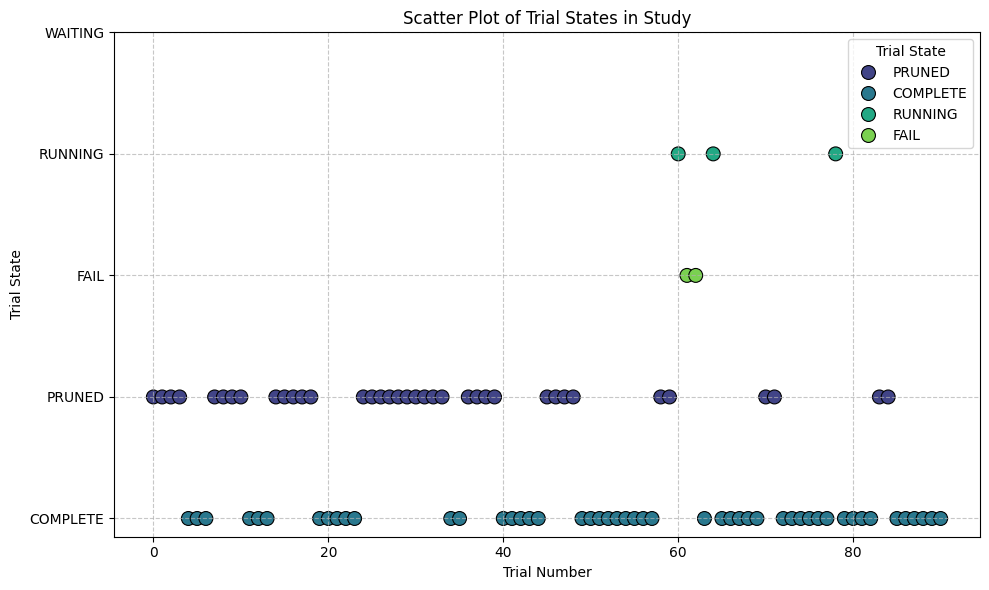

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Example data: Map trial states to numeric values
trial_states = [trial.state.name for trial in study.trials]
trial_numbers = range(len(study.trials))
state_mapping = {"COMPLETE": 1, "PRUNED": 2, "FAIL": 3, "RUNNING": 4, "WAITING": 5}
mapped_states = [state_mapping.get(state, 0) for state in trial_states]

# Create a DataFrame for plotting
data = pd.DataFrame({
    "Trial Number": trial_numbers,
    "Mapped State": mapped_states,
    "Trial State": trial_states
})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Trial Number",
    y="Mapped State",
    hue="Trial State",  # Add hue for categorical coloring
    palette="viridis",  # Use the Viridis colormap
    s=100,              # Marker size
    edgecolor="k"       # Black edges around markers
)

# Adjust y-axis ticks to display state names
plt.yticks(list(state_mapping.values()), list(state_mapping.keys()))

# Add title, labels, and grid
plt.xlabel("Trial Number")
plt.ylabel("Trial State")
plt.title("Scatter Plot of Trial States in Study")
plt.grid(True, linestyle="--", alpha=0.7)

# Save the plot in SVG format
plot_path_svg = os.path.join(tuning_dir, "trials_state_info_study.svg")
plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
print(f"Study's trials state info plot saved at: {plot_path_svg}")

# Show the plot
plt.tight_layout()
plt.show()


Study's temporal info plot saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/trial_state_aggregate_count_info_study.svg


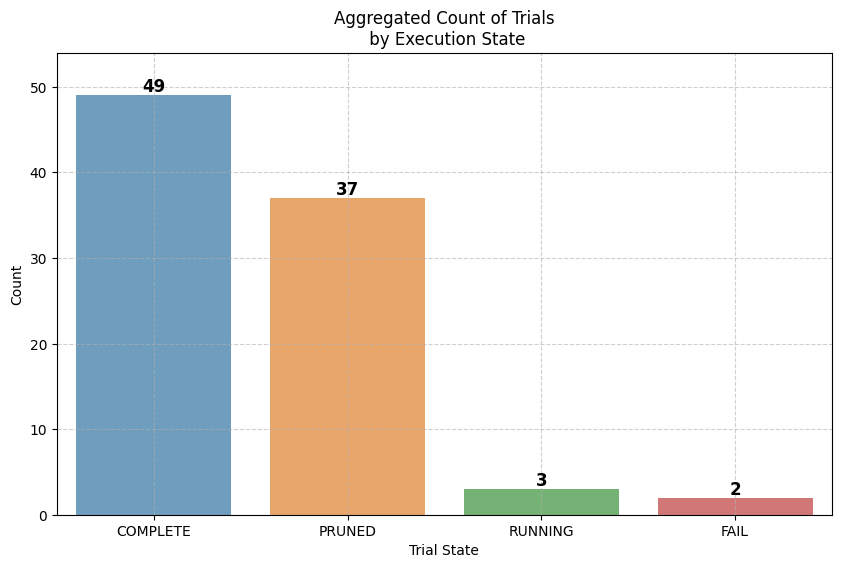

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import os

# Recalculate trial_counts if not already defined
trial_states = [trial.state.name for trial in study.trials]
trial_counts = pd.DataFrame(trial_states, columns=["Trial State"]).value_counts().reset_index()
trial_counts.columns = ["Trial State", "Count"]


# Create the plot with different colors for each state
plt.figure(figsize=(10, 6))
sns.barplot(
    data=trial_counts,
    x="Trial State",
    y="Count",
    hue="Trial State",  # Different colors for each state
    dodge=False,  # Ensure only one bar per state
    alpha=0.7
)

plt.title("Aggregated Count of Trials\n by Execution State")
plt.grid(linestyle="--", alpha=0.6)

# Adjust y-axis limits to make space for annotations
max_count = trial_counts["Count"].max()
plt.ylim(0, max_count + math.ceil(max_count * 0.1))  # Add 10% margin above the tallest bar

# Display values on top of each bar
for index, row in trial_counts.iterrows():
    plt.text(
        index, 
        row["Count"] + 0.4, 
        str(row["Count"]), 
        ha="center", 
        fontsize=12, 
        fontweight="bold"
    )


# Save the plot in vectorial formats (SVG and PDF)
svg_path = os.path.join(tuning_dir, f"trial_state_aggregate_count_info_study.svg")
plt.savefig(svg_path, format="svg", bbox_inches="tight")

print(f"Study's temporal info plot saved at: {svg_path}")

# Show the plot
plt.show()


Total Study Runtime: 8 days, 20:02:39.064417
Average Trial Duration: 1:58:17.328476
Minimum Trial Duration: 0:00:24.326908
Maximum Trial Duration: 23:31:14.951560
Total Time for PRUNED: 4:05:26.289787
Total Time for COMPLETE: 6 days, 21:33:12.184172
Total Time for FAIL: 3:50:46.431958
Study's temporal info plot saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/temporal_info_study.svg


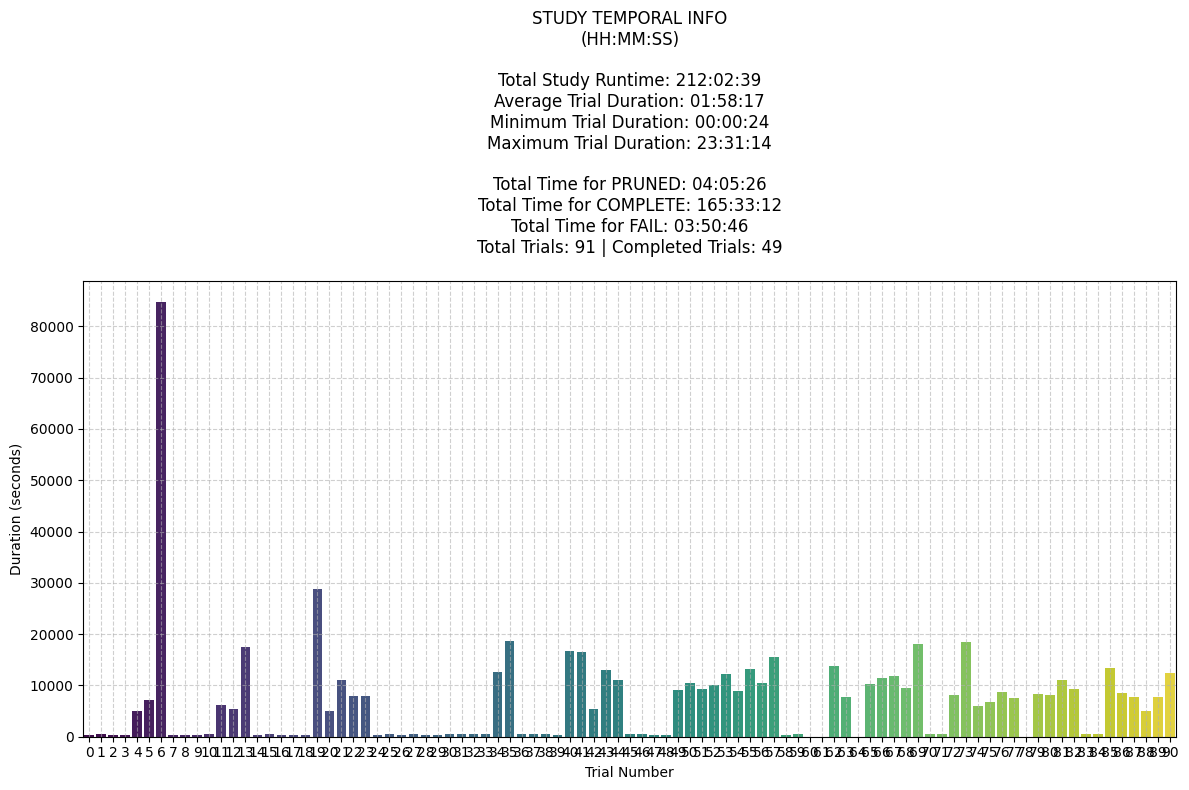

In [31]:
from datetime import timedelta, datetime
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Study-Level Statistics
study_start_time = min(
    (trial.datetime_start for trial in study.trials if trial.datetime_start),
    default=None
)

study_end_time = max(
    (trial.datetime_complete for trial in study.trials if trial.datetime_complete),
    default=datetime.now()
)
total_study_runtime = study_end_time - study_start_time

print(f"Total Study Runtime: {total_study_runtime}")

# Trial-Level Statistics
trial_durations = [
    trial.datetime_complete - trial.datetime_start
    for trial in study.trials
    if trial.datetime_start and trial.datetime_complete
]

if trial_durations:
    avg_duration = sum(trial_durations, timedelta()) / len(trial_durations)
    min_duration = min(trial_durations)
    max_duration = max(trial_durations)

    print(f"Average Trial Duration: {avg_duration}")
    print(f"Minimum Trial Duration: {min_duration}")
    print(f"Maximum Trial Duration: {max_duration}")
else:
    print("No completed trials to calculate durations.")

# Time by Trial State
state_durations = defaultdict(timedelta)
for trial in study.trials:
    if trial.datetime_start and trial.datetime_complete:
        duration = trial.datetime_complete - trial.datetime_start
        state_durations[trial.state] += duration

state_info_str = ""
for state, total_duration in state_durations.items():
    state_info = f"Total Time for {state.name}: {total_duration}"
    print(state_info)
    state_info_str += state_info + "\n"

# Visualize Trial Durations
trial_numbers = [trial.number for trial in study.trials]
trial_durations_in_seconds = [
    (trial.datetime_complete - trial.datetime_start).total_seconds()
    if trial.datetime_complete and trial.datetime_start else 0
    for trial in study.trials
]

# Convert timedelta objects to HH:MM:SS format
def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Format times
formatted_total_runtime = format_timedelta(total_study_runtime)
formatted_avg_duration = format_timedelta(avg_duration)
formatted_min_duration = format_timedelta(min_duration)
formatted_max_duration = format_timedelta(max_duration)

# Format state-specific durations
state_info_lines = [
    f"Total Time for {state.name}: {format_timedelta(duration)}"
    for state, duration in state_durations.items()
]
state_info_str = "\n".join(state_info_lines)
completed_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

# Create DataFrame for Seaborn
data = {
    "Trial Number": trial_numbers,
    "Duration (seconds)": trial_durations_in_seconds
}
df = pd.DataFrame(data)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df,
    x="Trial Number",
    y="Duration (seconds)",
    hue="Trial Number",  # Use hue to map colors
    dodge=False,  # Prevent multiple bars for each hue
    palette="viridis",  # Apply the color palette
    legend=False        # Hide the legend since it is unnecessary
)

# Add labels and title
plt.xlabel("Trial Number")
plt.ylabel("Duration (seconds)")
title_text = (
    "STUDY TEMPORAL INFO\n(HH:MM:SS)\n\n"
    f"Total Study Runtime: {formatted_total_runtime}\n"
    f"Average Trial Duration: {formatted_avg_duration}\n"
    f"Minimum Trial Duration: {formatted_min_duration}\n"
    f"Maximum Trial Duration: {formatted_max_duration}\n\n"
    f"{state_info_str}\n"
    f"Total Trials: {len(study.trials)} | Completed Trials: {len(completed_trials)}"
)
plt.title(title_text, loc="center", pad=20)
plt.grid(linestyle="--", alpha=0.6)

# Save the plot in SVG format
plot_path_svg = os.path.join(tuning_dir, "temporal_info_study.svg")
plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
print(f"Study's temporal info plot saved at: {plot_path_svg}")

# Show the plot
plt.tight_layout()
plt.show()

Histogram of trial durations saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/trial_duration_histogram.svg


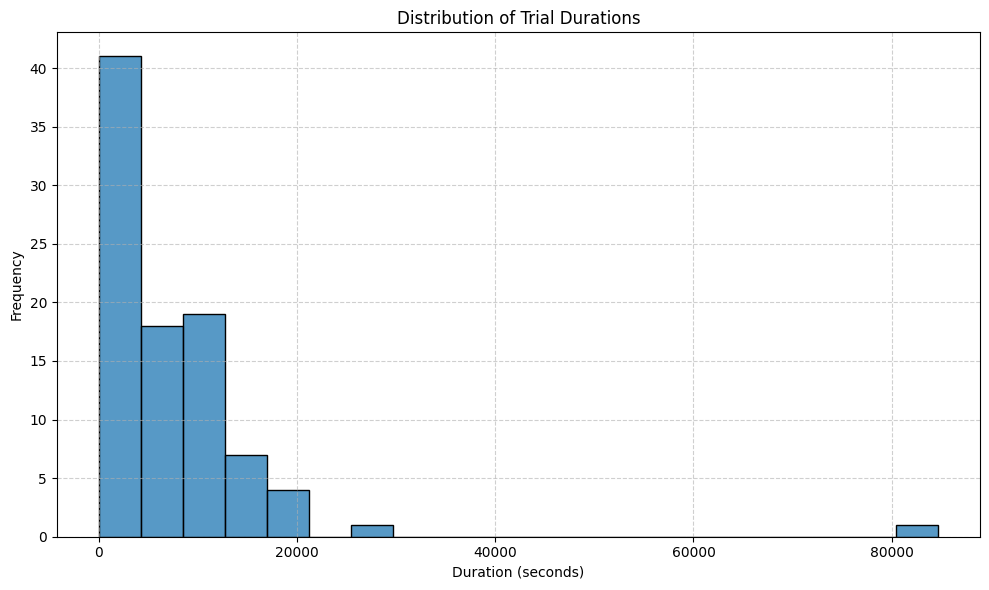

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Create DataFrame for durations
data = {
    "Duration (seconds)": trial_durations_in_seconds
}
df = pd.DataFrame(data)

# Plot histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="Duration (seconds)",
)

# Add labels and title
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title(
    "Distribution of Trial Durations",
    loc="center"
)
plt.grid(linestyle="--", alpha=0.6)

# Save the histogram in SVG format
histogram_path_svg = os.path.join(tuning_dir, "trial_duration_histogram.svg")
plt.savefig(histogram_path_svg, format="svg", bbox_inches="tight")
print(f"Histogram of trial durations saved at: {histogram_path_svg}")

# Show the plot
plt.tight_layout()
plt.show()


Bar plot of CUDA memory usage saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/cuda_memory_usage_info_study.svg


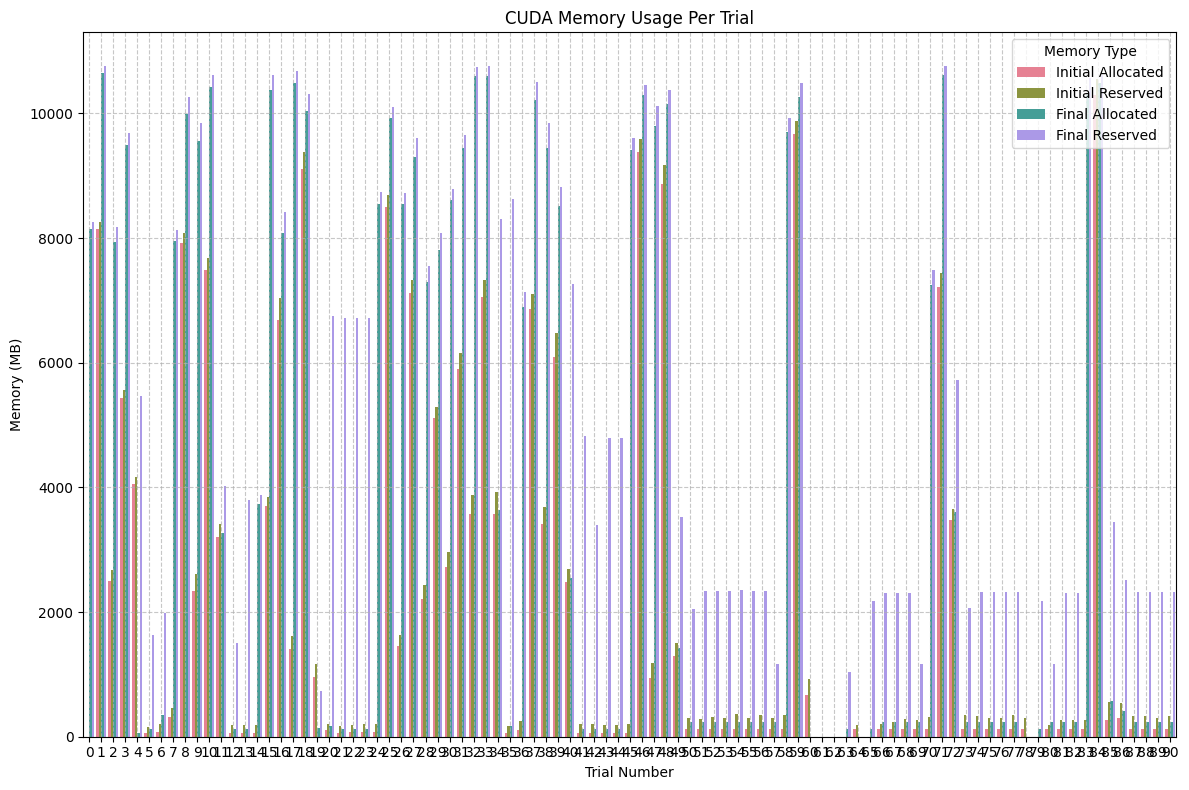

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Extract data for plotting
trial_numbers = list(range(0, len(study.trials)))
initial_allocated = [trial.user_attrs["initial_allocated_cuda_memory"] for trial in study.trials if "initial_allocated_cuda_memory" in trial.user_attrs]
initial_reserved = [trial.user_attrs["initial_reserved_cuda_memory"] for trial in study.trials if "initial_reserved_cuda_memory" in trial.user_attrs]
final_allocated = [trial.user_attrs["final_allocated_cuda_memory"] for trial in study.trials if "final_allocated_cuda_memory" in trial.user_attrs]
final_reserved = [trial.user_attrs["final_reserved_cuda_memory"] for trial in study.trials if "final_reserved_cuda_memory" in trial.user_attrs]

# Prepare the data for Seaborn
data = pd.DataFrame({
    "Trial Number": trial_numbers,
    "Initial Allocated": initial_allocated,
    "Initial Reserved": initial_reserved,
    "Final Allocated": final_allocated,
    "Final Reserved": final_reserved,
})

# Melt the data for easier plotting with Seaborn
data_melted = data.melt(id_vars="Trial Number", 
                        var_name="Memory Type", 
                        value_name="Memory (MB)")

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_melted,
    x="Trial Number",
    y="Memory (MB)",
    hue="Memory Type",
    dodge=True,  # Ensure separate bars for each memory type
    palette="husl"  # Color palette
)

# Add labels and title
plt.xlabel("Trial Number")
plt.ylabel("Memory (MB)")
plt.title("CUDA Memory Usage Per Trial")
plt.legend(title="Memory Type", loc="upper right")
plt.grid(linestyle="--", alpha=0.7)

# Save the plot as an SVG file
plot_path_svg = os.path.join(tuning_dir, f"cuda_memory_usage_info_study.svg")
plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
print(f"Bar plot of CUDA memory usage saved at: {plot_path_svg}")

# Show the plot
plt.tight_layout()
plt.show()


Histogram for Initial Allocated saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/initial_allocated_memory_usage_histogram.svg


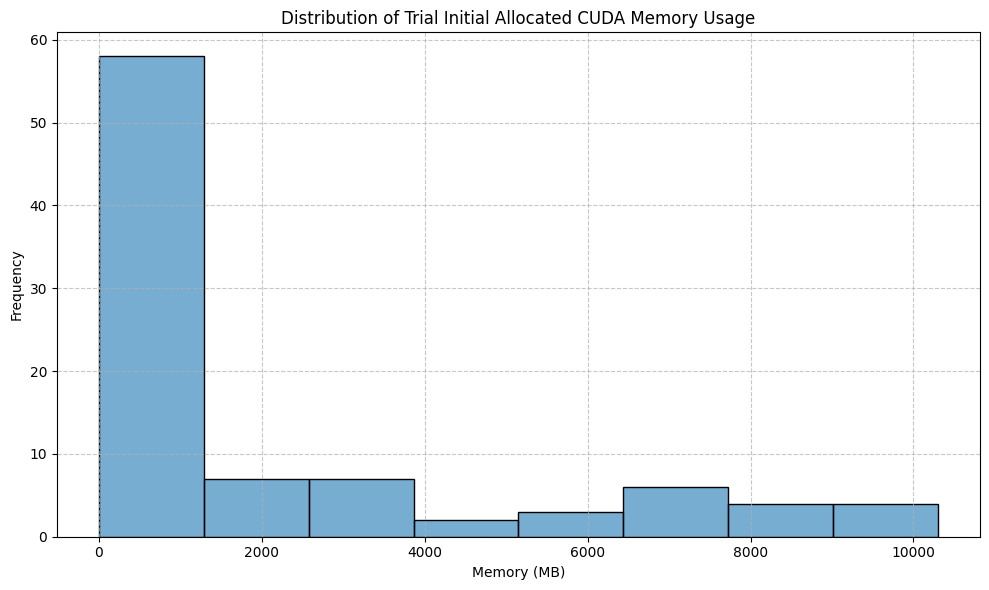

Histogram for Initial Reserved saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/initial_reserved_memory_usage_histogram.svg


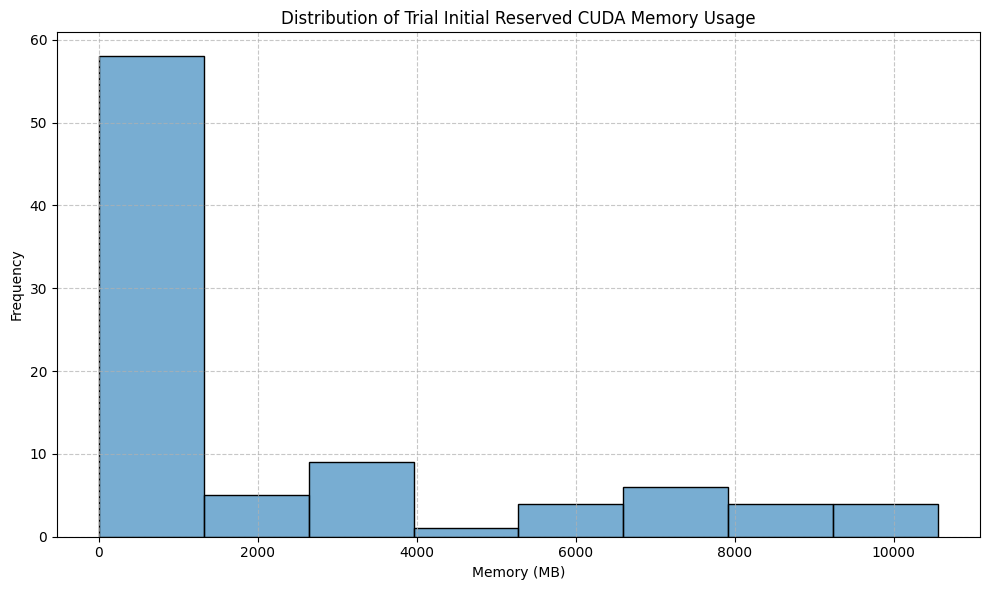

Histogram for Final Allocated saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/final_allocated_memory_usage_histogram.svg


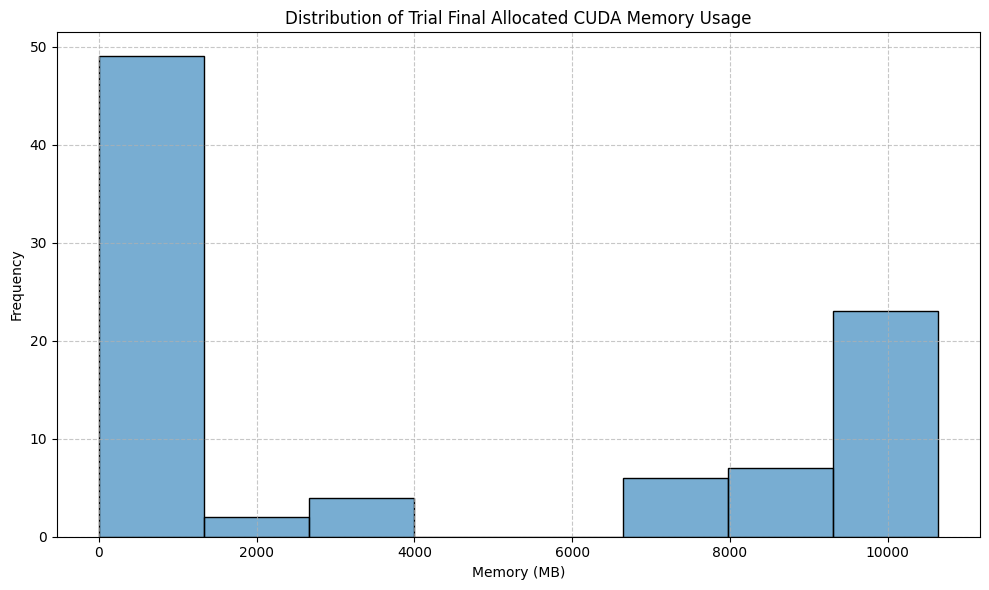

Histogram for Final Reserved saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/final_reserved_memory_usage_histogram.svg


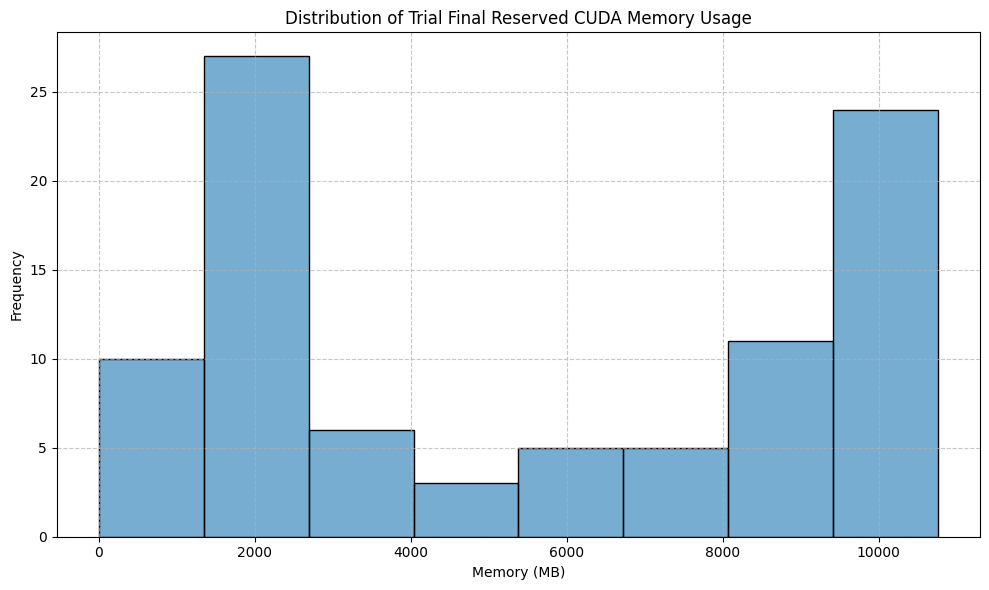

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Extract data for plotting
initial_allocated = [trial.user_attrs["initial_allocated_cuda_memory"] for trial in study.trials if "initial_allocated_cuda_memory" in trial.user_attrs]
initial_reserved = [trial.user_attrs["initial_reserved_cuda_memory"] for trial in study.trials if "initial_reserved_cuda_memory" in trial.user_attrs]
final_allocated = [trial.user_attrs["final_allocated_cuda_memory"] for trial in study.trials if "final_allocated_cuda_memory" in trial.user_attrs]
final_reserved = [trial.user_attrs["final_reserved_cuda_memory"] for trial in study.trials if "final_reserved_cuda_memory" in trial.user_attrs]

# Combine the data into a dictionary for convenience
data = {
    "Initial Allocated": initial_allocated,
    "Initial Reserved": initial_reserved,
    "Final Allocated": final_allocated,
    "Final Reserved": final_reserved
}

# Create separate histograms for each memory type
for label, values in data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(
        values,
        alpha=0.6
    )
    
    # Add labels and title
    plt.xlabel("Memory (MB)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Trial {label} CUDA Memory Usage")
    plt.grid(linestyle="--", alpha=0.7)

    # Save the plot in SVG format
    plot_path_svg = os.path.join(tuning_dir, f"{label.lower().replace(' ', '_')}_memory_usage_histogram.svg")
    plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
    print(f"Histogram for {label} saved at: {plot_path_svg}")

    # Show the plot
    plt.tight_layout()
    plt.show()


Dual bar plot saved at: executions/swin_unetr/tuning-train-test/id=143/tuning/model_params_flops_study_bar.svg


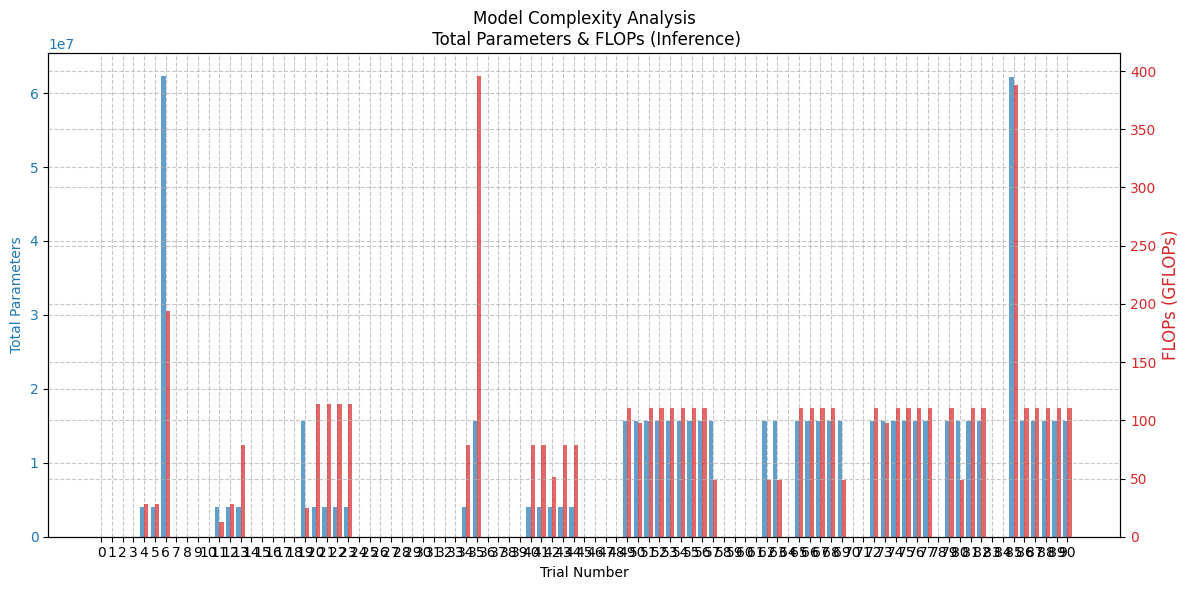

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Extract data for plotting
trial_numbers = list(range(0, len(study.trials)))
total_params = [trial.user_attrs["model_total_params"] for trial in study.trials if "model_total_params" in trial.user_attrs]
flops_inference = [trial.user_attrs["model_gflops_inference"] for trial in study.trials if "model_gflops_inference" in trial.user_attrs]

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width for better visualization
bar_width = 0.4

# Bar positions
x_indices_params = np.arange(len(total_params))
x_indices_flops = x_indices_params + bar_width

# Plot total parameters as bars
color = 'tab:blue'
ax1.set_xlabel("Trial Number")
ax1.set_ylabel("Total Parameters", color=color)
ax1.bar(x_indices_params, total_params, width=bar_width, label="Total Parameters", color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='--', alpha=0.7)

# Second y-axis for FLOPs
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("FLOPs (GFLOPs)", color=color, fontsize=12)
ax2.bar(x_indices_flops, flops_inference, width=bar_width, label="FLOPs (GFLOPs)", color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(linestyle='--', alpha=0.7)

# Adjust x-axis ticks to align with bars
ax1.set_xticks(x_indices_params + bar_width / 2)
ax1.set_xticklabels([f"{i}" for i in range(len(total_params))])

# Add title
plt.title("Model Complexity Analysis\n Total Parameters & FLOPs (Inference)")

# Adjust layout for better spacing
fig.tight_layout()

# Save the plot as an SVG file
plot_path_svg = os.path.join(tuning_dir, f"model_params_flops_study_bar.svg")
plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
print(f"Dual bar plot saved at: {plot_path_svg}")

# Show the plot
plt.show()


In [36]:
best_trial_model_info = {
    "model_total_params": study.best_trial.user_attrs["model_total_params"],
    "model_trainable_params": study.best_trial.user_attrs["model_trainable_params"],
    "model_non_trainable_params": study.best_trial.user_attrs["model_non_trainable_params"],
    "model_gflops_inference": study.best_trial.user_attrs["model_gflops_inference"] # IN GFLOPS
}

best_trial_overlap_training = study.best_trial.params["overlap_training"]
best_trial_overlap_training = (best_trial_overlap_training, best_trial_overlap_training)

best_trial_training_config={
    "lr_optimizer": study.best_trial.params["lr_optimizer"],
    "weight_decay_optimizer": study.best_trial.params["weight_decay_optimizer"],
    "warmup_epochs_lr_scheduler": study.best_trial.params["warmup_epochs_lr_scheduler"],
    "max_training_epochs": study.best_trial.params["max_training_epochs"],
    "patience_epochs_early_stopping": study.best_trial.params["patience_epochs_early_stopping"],
    "batch_size_training": study.best_trial.params["batch_size_training"],
    "batch_size_inference": study.best_trial.params["batch_size_inference"],
    "num_batches_grad_accumulation": study.best_trial.params["num_batches_grad_accumulation"],
    "overlap_training": best_trial_overlap_training,
    "overlap_inference": eval(study.best_trial.params["overlap_inference"]),
    "post_processing_strategy": study.best_trial.params["post_processing_strategy"],
    "pre_processing_strategy": study.best_trial.params["pre_processing_strategy"]
}
# Architecture
best_trial_model_spatial_input_dim = study.best_trial.params["model_spatial_input_dims"]
best_trial_exponent_model_temporal_input_dim = study.best_trial.params["exponent_model_temporal_input_dim"]
best_trial_model_temporal_input_dim = 64*(2**best_trial_exponent_model_temporal_input_dim)
best_trial_model_input_dimensions = (best_trial_model_spatial_input_dim, best_trial_model_spatial_input_dim) + (best_trial_model_temporal_input_dim,)
best_trial_initial_feature_embedding_size = 12*(2**study.best_trial.params["exponent_initial_feature_embedding_size"])

# Architecture Configuration
best_trial_architecture_config={
    "use_SWIN_v2": study.best_trial.params["use_SWIN_v2"],
    "model_input_dimensions": best_trial_model_input_dimensions,
    "model_input_channels": 1,
    "model_output_channels": 2, # 2 output channels = 2 output classes (i.e. defective/non-defective)
    "initial_feature_embedding_size": best_trial_initial_feature_embedding_size,
    "patch_embedding_size": (study.best_trial.params["patch_embedding_size"], study.best_trial.params["patch_embedding_size"], study.best_trial.params["patch_embedding_size"]),
    "num_swin_transformer_blocks_in_layers": (study.best_trial.params["num_swin_transformer_blocks_in_layers"], study.best_trial.params["num_swin_transformer_blocks_in_layers"], study.best_trial.params["num_swin_transformer_blocks_in_layers"], study.best_trial.params["num_swin_transformer_blocks_in_layers"]),
    "mlp_ratio": study.best_trial.params["mlp_ratio"],
}

best_trial_initial_attention_head = study.best_trial.params["initial_attention_head"]
best_trial_attention_heads = (best_trial_initial_attention_head, best_trial_initial_attention_head*2, best_trial_initial_attention_head*4, best_trial_initial_attention_head*8)

# Attention Configuration
best_trial_attention_config={
    "heads": best_trial_attention_heads,
    "window_size": (study.best_trial.params["attention_window_size"], study.best_trial.params["attention_window_size"], study.best_trial.params["attention_window_size"]),
    "qkv_bias": study.best_trial.params["attention_qkv_projections_bias"],
    "drop_rate": study.best_trial.params["attention_weights_drop_rate"]
}

# Normalization Configuration
best_trial_normalization_config={
    "use_norm_in_swinViT_after_layer": study.best_trial.params["layer_normalization_after_each_layer_in_SWIN_Transformer"],
    "patch_norm_in_swinViT": study.best_trial.params["normalization_after_patch_embedding"],
    "unet_block_norm_type": study.best_trial.params["type_normalization_in_UNET_block"]
}

# Regularization Configuration
best_trial_regularization_config={
    "transformer_block_drop_rate": study.best_trial.params["transformer_block_drop_rate"],
    "transformer_block_residual_block_dropout_path_rate": study.best_trial.params["transformer_block_residual_block_dropout_path_rate"],
}

# Combine all configs into a single dictionary
best_trial_config = {
    "TRIAL_ID": study.best_trial.number,
    "VAL_LOSS": study.best_trial.value,
    "MODEL_INFO": best_trial_model_info,
    "TRAINING_CONFIG": best_trial_training_config,
    "ARCHITECTURE_CONFIG": best_trial_architecture_config,
    "ATTENTION_CONFIG": best_trial_attention_config,
    "NORMALIZATION_CONFIG": best_trial_normalization_config,
    "REGULARIZATION_CONFIG": best_trial_regularization_config
}

# Generate JSON with best trial's hyperparameter config
info_best_trial_json_file_path = os.path.join(tuning_dir, "best_trial", "best_trial_summary_info.json")
with open(info_best_trial_json_file_path, "w") as json_file:
    json.dump(best_trial_config, json_file, indent=4)
print(f"Best trial config JSON file successfully generated at: {info_best_trial_json_file_path}")

print()
print(f"{'=' * 50}")
print(f"{'=' * 18} BEST TRIAL: {study.best_trial.number} {'=' * 17}")
print(f"{'=' * 16} Val. Loss: {study.best_trial.value:.4f} {'=' * 16}")
print(f"{'=' * 50}")
print()

print(f"Total Parameters: {study.best_trial.user_attrs['model_total_params']}")
print(f"Trainable Parameters: {study.best_trial.user_attrs['model_trainable_params']}")
print(f"Non-Trainable Parameters: {study.best_trial.user_attrs['model_non_trainable_params']}")
print(f"FLOPs: {study.best_trial.user_attrs['model_gflops_inference'] :.3f} GFLOPs")

print()
print()

# Pretty-print the configurations
pprint.pprint(best_trial_config, sort_dicts=False, width=100)

print()

Best trial config JSON file successfully generated at: executions/swin_unetr/tuning-train-test/id=143/tuning/best_trial/best_trial_summary_info.json

================== BEST TRIAL: 51 =================
================ Val. Loss: 0.1425 ================

Total Parameters: 15707839
Trainable Parameters: 15707839
Non-Trainable Parameters: 0
FLOPs: 110.338 GFLOPs


{'TRIAL_ID': 51,
 'VAL_LOSS': 0.1424621492624282,
 'MODEL_INFO': {'model_total_params': 15707839,
                'model_trainable_params': 15707839,
                'model_non_trainable_params': 0,
                'model_gflops_inference': 110.338230272},
 'TRAINING_CONFIG': {'lr_optimizer': 0.0001768865726490981,
                     'weight_decay_optimizer': 3.1028473488583218e-06,
                     'warmup_epochs_lr_scheduler': 7,
                     'max_training_epochs': 10000,
                     'patience_epochs_early_stopping': 15,
                     'batch_size_training': 2,
                     'batch_size_inf